<a href="https://colab.research.google.com/github/Pauladrea03/supervised-and-unsupervised-learning-project/blob/main/supervisado_calculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Autores**
- Isabela Pareja Gil
- Juliana Rueda Arango
- Paula Andrea Ortega Sanjuan
- Jose David Martínez Espinosa



#**Librerías**

In [ ]:
!pip install scikit-optimizer
!pip install scikit-learn graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Librerías de manipulación de datos
import pandas as pd
import numpy as np


# Opciones de Pandas
pd.set_option('display.max_columns', None)


# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import plotly.express as px
import graphviz
from plotly.subplots import make_subplots


# Librerías para estadística y pruebas
import scipy.stats as stats
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.formula.api import ols
import time
from sklearn.model_selection import cross_validate


# Librerías de machine learning y preprocesamiento
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import uniform, poisson
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.feature_selection import SequentialFeatureSelector


# Librerías para métricas de modelos
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from sklearn import tree


#Cargar datos

In [ ]:
file_id="1AvfKoiBlksY1RPiEC0DbUoiUoHEtLAkA"
df_calculo_diferencia = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id}', sep = ',')
del df_calculo_diferencia["Unnamed: 0"]
df_calculo_diferencia.head(10)

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,4,4,en_casa,profesor,habilidad,madre,2,2,0,si,no,no,no,si,si,no,no,4,3,4,1,1,3,6,5,6,6
1,II,M,17,U,mayor_3,J,1,1,en_casa,otro,habilidad,padre,1,2,0,no,si,no,no,no,si,yes,no,5,3,3,1,1,3,4,5,5,6
2,II,M,15,U,menor_e3,J,1,1,en_casa,otro,otro,madre,1,2,3,si,no,si,no,si,si,yes,no,4,3,2,2,3,3,10,7,8,10
3,II,M,15,U,mayor_3,J,4,2,salud,servicios,recomendacion,madre,1,3,0,no,si,si,si,si,si,yes,yes,3,2,2,1,1,5,2,15,14,15
4,II,M,16,U,mayor_3,J,3,3,otro,otro,recomendacion,padre,1,2,0,no,si,si,no,si,si,no,no,4,3,2,1,2,5,4,6,10,10
5,II,H,16,U,menor_e3,J,4,3,servicios,otro,reputacion,madre,1,2,0,no,si,si,si,si,si,yes,no,5,4,2,1,2,5,10,15,15,15
6,II,H,16,U,menor_e3,J,2,2,otro,otro,recomendacion,madre,1,2,0,no,no,no,no,si,si,yes,no,4,4,4,1,1,3,0,12,12,11
7,II,M,17,U,mayor_3,S,4,4,otro,profesor,recomendacion,madre,2,2,0,si,si,no,no,si,si,no,no,4,1,4,1,1,1,6,6,5,6
8,II,H,15,U,menor_e3,S,3,2,servicios,otro,recomendacion,madre,1,2,0,no,si,si,no,si,si,yes,no,4,2,2,1,1,1,0,16,18,19
9,II,H,15,U,mayor_3,J,3,4,otro,otro,recomendacion,madre,1,2,0,no,si,si,si,si,si,yes,no,5,5,1,1,1,5,0,14,15,15


# Análisis exploratorio y limpieza de datos


In [ ]:
#Resumen de caracteristicas basicas de la base de datos

def visual_check(df):

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    print("Filas duplicadas:\n",df_fil_duplicated,'\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

    numerical_columns = df.select_dtypes(include=['number'])
    display(numerical_columns.describe().T)

visual_check(df_calculo_diferencia)


Shape:
 (397, 33) 

Data Types:
 departamento          object
sexo                  object
edad                   int64
direccion             object
t_familia             object
padres_status         object
madre_edu              int64
padre_edu              int64
madre_trab            object
padre_trab            object
razon                 object
guardian              object
t_examen               int64
t_estudio              int64
faltas                 int64
soporte_edu_extra     object
soporte_edu_fam       object
monitores             object
actividades_extra     object
preuniversitario      object
postgrado             object
internet              object
relacion_sen          object
relacion_fam           int64
tiempo_libre           int64
salir_amigos           int64
cons_alcohol_sem       int64
cons_alcohol_finde     int64
salud                  int64
ausencias              int64
nota_01                int64
nota_02                int64
nota_03                int64
dtype: obj

,count,mean,std,min,25%,50%,75%,max
edad,397.0,16.705290,1.279716,15.0,16.0,17.0,18.0,22.0
madre_edu,397.0,2.748111,1.097301,0.0,2.0,3.0,4.0,4.0
padre_edu,397.0,2.521411,1.090672,0.0,2.0,2.0,3.0,4.0
t_examen,397.0,1.450882,0.696840,1.0,1.0,1.0,2.0,4.0
t_estudio,397.0,2.032746,0.838731,1.0,1.0,2.0,2.0,4.0
faltas,397.0,0.335013,0.742714,0.0,0.0,0.0,0.0,3.0
relacion_fam,397.0,3.944584,0.894400,1.0,4.0,4.0,5.0,5.0
tiempo_libre,397.0,3.234257,0.996476,1.0,3.0,3.0,4.0,5.0
salir_amigos,397.0,3.108312,1.112762,1.0,2.0,3.0,4.0,5.0
cons_alcohol_sem,397.0,1.478589,0.889143,1.0,1.0,1.0,2.0,5.0


La base de datos está compuesta por 397 filas y 33 columnas, de las cuales encontramos algunas numéricas y categóricas (como object).

En este caso se observan dos filas duplicadas, sin embargo la base de datos no incluye un identificador por persona, por lo tanto no es posible conocer si realmente se está repitiendo la misma persona. No se eliminan los duplicados bajo el supuesto de que pueden existir dos personas con el mismo registro de datos en esta base.

La base de datos no presenta faltantes.

### Analisis univariado

In [ ]:
#Conocer los valores que tienen las variables numéricas
numerical_columns = df_calculo_diferencia.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'edad':
[18 17 15 16 19 22 20 21]


Valores únicos en la columna 'madre_edu':
[4 1 3 2 0]


Valores únicos en la columna 'padre_edu':
[4 1 2 3 0]


Valores únicos en la columna 't_examen':
[2 1 3 4]


Valores únicos en la columna 't_estudio':
[2 3 1 4]


Valores únicos en la columna 'faltas':
[0 3 2 1]


Valores únicos en la columna 'relacion_fam':
[4 5 3 1 2]


Valores únicos en la columna 'tiempo_libre':
[3 2 4 1 5]


Valores únicos en la columna 'salir_amigos':
[4 3 2 1 5]


Valores únicos en la columna 'cons_alcohol_sem':
[1 2 5 3 4]


Valores únicos en la columna 'cons_alcohol_finde':
[1 3 2 4 5]


Valores únicos en la columna 'salud':
[3 5 1 2 4]


Valores únicos en la columna 'ausencias':
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]


Valores únicos en la columna 'nota_01':
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]


Valores únicos en la columna 'nota_02':
[ 6  5  8 14 10 15 12 18

Se considera que hay variables númericas que realmente representan categorías, por lo cual se realiza la respectiva conversión de las siguientes variables:

*  *relacion_fam*
*  *salud*
*  *tiempo_libre*
*  *salir_amigos*
*  *cons_alcohol_sem*
*  *cons_alcohol_finde*
*  *madre_edu*
*  *padre_edu*
*  *t_examen*
*  *t_estudio*

Adicionalmente, a las variables *'internet'* y *'relacion_sen'* se les ajustó el valor de 'yes' a 'si'

#### ***1.   Variables númericas***



In [ ]:
#Conversión de las variable núméricas a categóricas

def cambio_categoria(df):
    categoricas_1 =['relacion_fam', 'salud']
    categoricas_2 = ['tiempo_libre', 'salir_amigos', 'cons_alcohol_sem', 'cons_alcohol_finde']

    conversion_1 = {
        1: 'Muy malo',
        2: 'Malo',
        3: 'Regular',
        4: 'Bueno',
        5: 'Excelente'
    }
    conversion_2 = {
        1: 'Muy bajo',
        2: 'Bajo',
        3: 'Medio',
        4: 'Alto',
        5: 'Muy alto'
    }

    conversion_padres_edu = {
        0: 'Ninguno',
        1: 'Primaria hasta 5°',
        2: '6° a 9°',
        3: '10° a 11°',
        4: 'Educación superior'
    }

    conversion_t_examen = {
        1: '< 15 min',
        2: '15 a 30 min',
        3: '30 min a 1 hora',
        4: '> 1 hora'
    }

    conversion_t_estudio = {
        1: '< 2 horas',
        2: '2 a 5 horas',
        3: '5 a 10 horas',
        4: '> 10 horas'
    }

    conversion_yes = {
        'yes': 'si'
    }

    for col in df.columns:
        if col in categoricas_1:
            df[col] = df[col].replace(conversion_1)
        elif col in categoricas_2:
            df[col]= df[col].replace(conversion_2)
        elif col == 'madre_edu' or col =='padre_edu':
            df[col]= df[col].replace(conversion_padres_edu)
        elif col == 't_examen':
            df[col] = df[col].replace(conversion_t_examen)
        elif col == 't_estudio':
            df[col] = df[col].replace(conversion_t_estudio)
        elif col == 'internet' or col == 'relacion_sen':
            df[col] = df[col].replace(conversion_yes)
    return df
cambio_categoria(df_calculo_diferencia)
df_calculo_diferencia.head()

,departamento,sexo,edad,direccion,t_familia,padres_status,madre_edu,padre_edu,madre_trab,padre_trab,razon,guardian,t_examen,t_estudio,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,relacion_fam,tiempo_libre,salir_amigos,cons_alcohol_sem,cons_alcohol_finde,salud,ausencias,nota_01,nota_02,nota_03
0,II,M,18,U,mayor_3,S,Educación superior,Educación superior,en_casa,profesor,habilidad,madre,15 a 30 min,2 a 5 horas,0,si,no,no,no,si,si,no,no,Bueno,Medio,Alto,Muy bajo,Muy bajo,Regular,6,5,6,6
1,II,M,17,U,mayor_3,J,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,habilidad,padre,< 15 min,2 a 5 horas,0,no,si,no,no,no,si,si,no,Excelente,Medio,Medio,Muy bajo,Muy bajo,Regular,4,5,5,6
2,II,M,15,U,menor_e3,J,Primaria hasta 5°,Primaria hasta 5°,en_casa,otro,otro,madre,< 15 min,2 a 5 horas,3,si,no,si,no,si,si,si,no,Bueno,Medio,Bajo,Bajo,Medio,Regular,10,7,8,10
3,II,M,15,U,mayor_3,J,Educación superior,6° a 9°,salud,servicios,recomendacion,madre,< 15 min,5 a 10 horas,0,no,si,si,si,si,si,si,si,Regular,Bajo,Bajo,Muy bajo,Muy bajo,Excelente,2,15,14,15
4,II,M,16,U,mayor_3,J,10° a 11°,10° a 11°,otro,otro,recomendacion,padre,< 15 min,2 a 5 horas,0,no,si,si,no,si,si,no,no,Bueno,Medio,Bajo,Muy bajo,Bajo,Excelente,4,6,10,10


**Análisis exploratorio**

In [ ]:
numerical_columns = df_calculo_diferencia.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'edad':
[18 17 15 16 19 22 20 21]


Valores únicos en la columna 'faltas':
[0 3 2 1]


Valores únicos en la columna 'ausencias':
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]


Valores únicos en la columna 'nota_01':
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]


Valores únicos en la columna 'nota_02':
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]


Valores únicos en la columna 'nota_03':
[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]




*   La columna edad presenta valores entre 15 y 22 años.
*   Se encuentran faltas entre 0 y 3, el valor 0 hace alusión a faltas que no se encuentran entre el rango 1-3.
*   Ausencias tiene valores entre 0 y 75.
*   nota_01, nota_2 y nota_3 tienen valores entre 0 y 20.

***Análisis univariado con gráficos***

In [ ]:
def num_vis(df):
    numeric_columns = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)
    fig_hist.update_layout(height=300 * n_rows, width=800, title_text="Histogramas variables numéricas")
    fig_hist.show()

num_vis(df_calculo_diferencia)

La variable independiente edad tiene una mayor concentración de valores entre 0 y 19 años, es decir, las personas entre 0 y 19 son la población más grande encontrada en la materia calculo diferencial. Por otro lado, es notable que la variable faltas tiene un gran desbalance en sus valores, pues la mayoría de estudiantes presentan 0 faltas lo que recordemos hace alusión no a faltas nulas si no a personas que no estan en el rango de 1-3. En Ausencias se identifica que solo pocos estudiantes se han ausentado más de 14 veces aproximadamente. Las notas presentan mayor acumulación, entre 7 y 15 aproximadamente, es decir, la mayoría de los estudiantes consiguen notas entre este rango.

#### ***2. Variables categoricas***

In [ ]:
#Resumen de la frecuencia y el ratio de las variables categoricas

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in df_calculo_diferencia.columns if df_calculo_diferencia[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(df_calculo_diferencia, col, plot=False)

              departamento      Ratio
departamento                         
II                     350  88.161209
MS                      47  11.838791
##########################################
      sexo      Ratio
sexo                 
M      209  52.644836
H      188  47.355164
##########################################
           direccion      Ratio
direccion                      
U                308  77.581864
R                 89  22.418136
##########################################
           t_familia      Ratio
t_familia                      
mayor_3          283  71.284635
menor_e3         114  28.715365
##########################################
               padres_status      Ratio
padres_status                          
J                        355  89.420655
S                         42  10.579345
##########################################
                    madre_edu      Ratio
madre_edu                               
Educación superior        132  33.249370
6° a 9

No se encontraron filas ni columnas duplicadas, y tampoco se detectaron datos nulos. Además, no fue necesario reagrupar ninguna variable categórica en menos subcategorías.

El único proceso realizado fue la transformación de algunas variables de numéricas a categóricas, ya que, dada la naturaleza de estas variables, se consideró que esta transformación era la más adecuada.

**Análisis univariado con gráficos**

En este análisis gráfico, debido a la extensividad de las variables categóricas, se seleccionan tres tipos de gráficos diferentes, elegidos según la mejor visualización que podría tener la categoría.

In [ ]:
fig = make_subplots(rows=2, cols=4,
                    subplot_titles=("<b>Relación Familiar<b>",
                                    "<b>Trabajo del Padre<b>",
                                    "<b>Trabajo de la Madre<b>",
                                    "<b>Tiempo libre después<br>de la universidad<b>",
                                    "<b>Consumo de alcohol<br>en jornada laboral<b>",
                                    "<b>Consumo de alcohol<br>en fin de semana<b>",
                                    "<b>Estado de salud actual<b>",
                                    "<b>Salir amigos<b>"))

# Datos para 'relacion_fam'
base_relacion_fam = df_calculo_diferencia.groupby(['relacion_fam'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'relacion_fam'
fig.add_trace(go.Bar(x=base_relacion_fam['count'], y=base_relacion_fam['relacion_fam'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=1)

# Datos para 'padre_trab'
base_padre_trab = df_calculo_diferencia.groupby(['padre_trab'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'padre_trab'
fig.add_trace(go.Bar(x=base_padre_trab['count'], y=base_padre_trab['padre_trab'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=2)

# Datos para 'madre_trab'
base_madre_trab = df_calculo_diferencia.groupby(['madre_trab'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'madre_trab'
fig.add_trace(go.Bar(x=base_madre_trab['count'], y=base_madre_trab['madre_trab'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=3)

# Datos para 'tiempo_libre'
base_tiempo_libre = df_calculo_diferencia.groupby(['tiempo_libre'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'tiempo_libre'
fig.add_trace(go.Bar(x=base_tiempo_libre['count'], y=base_tiempo_libre['tiempo_libre'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=4)

# Datos para 'cons_alcohol_sem'
base_cons_alcohol_sem = df_calculo_diferencia.groupby(['cons_alcohol_sem'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'cons_alcohol_sem'
fig.add_trace(go.Bar(x=base_cons_alcohol_sem['count'], y=base_cons_alcohol_sem['cons_alcohol_sem'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=1)

# Datos para 'cons_alcohol_finde'
base_cons_alcohol_finde = df_calculo_diferencia.groupby(['cons_alcohol_finde'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'cons_alcohol_finde'
fig.add_trace(go.Bar(x=base_cons_alcohol_finde['count'], y=base_cons_alcohol_finde['cons_alcohol_finde'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=2)

# Datos para 'salud'
base_salud = df_calculo_diferencia.groupby(['salud'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'salud'
fig.add_trace(go.Bar(x=base_salud['count'], y=base_salud['salud'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=3)

# Datos para 'salir_amigos'
base_salir_amigos = df_calculo_diferencia.groupby(['salir_amigos'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'}).sort_values('count', ascending=False)

# Añadir barras para 'salir_amigos'
fig.add_trace(go.Bar(x=base_salir_amigos['count'], y=base_salir_amigos['salir_amigos'], orientation='h',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=4)

# Personalización de la figura
fig.update_layout(height=800, width=1500)

# Mostrar el gráfico
fig.show()

**Análisis**

- Relación Familiar: La mayoría de los estudiantes tienen una relación "Buena" con sus familias, con más de 200 estudiantes en esta categoría. Otras categorías como "Excelente" y "Malo" muestran menos frecuencia, siendo la relación "Muy mala" la menos común entre los estudiantes.

- Trabajo del Padre: El trabajo más común entre los padres es en "otros" sectores, superando los 150 estudiantes. Una proporción menor de padres trabajan en sectores como "profesor" o en casa ("en casa"), siendo esta última la menos frecuente.

- Trabajo de la Madre: Las madres tienen trabajos más distribuidos entre categorías como "servicios" y "en casa", ambos superando los 100 estudiantes. Trabajos como "salud" y "profesor" tienen menor representación.

- Tiempo libre después de la universidad: La mayoría de los estudiantes reportan tener un nivel "Medio" de tiempo libre, mientras que la categoría "Muy alto" y "Alto" tiene menos de 100 estudiantes.

- Consumo de alcohol en jornada laboral: El consumo de alcohol durante la jornada laboral es mayormente "Muy bajo", con más de 200 estudiantes en esta categoría. Otras categorías como "Medio" y "Muy alto" muestran frecuencias más pequeñas.

- Consumo de alcohol en fin de semana: Aunque la mayoría de los estudiantes tienen un consumo "Muy bajo" en el fin de semana, se observa una mayor distribución hacia categorías más altas como "Medio" y "Muy alto" comparado con la jornada laboral.

- Estado de salud actual: El estado de salud reportado como "Bueno" es el más frecuente, seguido de "Excelente", y menos estudiantes se consideran en estado de salud "Malo" o "Muy malo".

- Salir con amigos: La mayoría de los estudiantes reportan salir con amigos con una frecuencia "Alta", mientras que las categorías "Medio" y "Bajo" tienen menos frecuencia, y "Muy alto" y "Muy bajo" son las menos comunes.

In [ ]:
# Crear la figura con subplots y especificar el número de filas y columnas
fig = make_subplots(rows=3, cols=3, subplot_titles=(
        "<b>% de estudiantes que tienen<br>una relación romántica<b>",
        "<b>% de estudiantes que tienen<br>acceso a internet en casa<b>",
        "<b>% de estudiantes que quieren<br>realizar postgrado<b>",
        "<b>% de estudiantes que asistieron<br>a preuniversitario<b>",
        "<b>% de estudiantes que participan<br>en actividades extraescolares<b>",
        "<b>% de estudiantes que tienen clases<br>extras pagadas por tutores privados<b>",
        "<b>% de estudiantes que tienen<br>apoyo educativo familiar<b>",
        "<b>% de estudiantes que tienen<br>apoyo educativo adicional<b>"
    ),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
     [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
      [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.1)

# Definir los gráficos de torta y añadirlos a los subplots

# Gráfico 1: Relación romántica
base = df_calculo_diferencia.groupby(['relacion_sen'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='relacion_sen',hole=.5).data[0], row=1, col=1)

# Gráfico 2: Acceso a internet en casa
base = df_calculo_diferencia.groupby(['internet'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='internet',hole=.5).data[0], row=1, col=2)

# Gráfico 3: Quieren realizar postgrado
base = df_calculo_diferencia.groupby(['postgrado'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='postgrado', hole=.5).data[0], row=1, col=3)

# Gráfico 4: Asistencia a preuniversitario
base = df_calculo_diferencia.groupby(['preuniversitario'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='preuniversitario',hole=.5).data[0], row=2, col=1)

# Gráfico 5: Actividades extraescolares
base = df_calculo_diferencia.groupby(['actividades_extra'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='actividades_extra',hole=.5).data[0], row=2, col=2)

# Gráfico 6: Clases extras pagadas por tutores privados
base = df_calculo_diferencia.groupby(['monitores'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='monitores',hole=.5).data[0], row=2, col=3)

# Gráfico 7: Apoyo educativo familiar
base = df_calculo_diferencia.groupby(['soporte_edu_fam'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='soporte_edu_fam',hole=.5).data[0], row=3, col=1)

# Gráfico 8: Apoyo educativo adicional
base = df_calculo_diferencia.groupby(['soporte_edu_extra'])[['nota_01']].count().reset_index().rename(columns ={'nota_01':'count'})
fig.add_trace(px.pie(base, values='count', names='soporte_edu_extra',hole=.5).data[0], row=3, col=2)

# Personalizar el diseño de la figura
fig.update_layout(height=1000, width=1500, template='simple_white')

# Mostrar la figura
fig.show()

**Análisis**

- Interés en realizar un postgrado: El 95% de los estudiantes desea continuar con estudios de postgrado, mostrando una clara tendencia hacia la educación superior.

- Acceso a internet en casa: El 82.9% de los estudiantes tiene acceso a internet en su hogar, lo que refleja una alta conectividad y acceso a recursos educativos en línea.

- Asistencia a preuniversitario: Un 79.6% de los estudiantes asistió a un preuniversitario, indicando un enfoque fuerte en la preparación académica antes de la universidad.

- Apoyo educativo adicional: Solo el 13.1% de los estudiantes recibe apoyo educativo adicional, lo que sugiere un área de oportunidad para mejorar el soporte académico.

In [ ]:
fig = make_subplots(
    rows=3, cols=4,
    subplot_titles=(
        "<b>Tutor del estudiante<b>",
        "<b>Razón para elegir la carrera<b>",
        "<b>Sexo del estudiante<b>",
        "<b>Tamaño de la familia<b>",
        "<b>Dirección<b>",
        "<b>Tiempo de estudio semanal<b>",
        "<b>Tiempo que demoró en<br>realizar el primer examen<b>",
        "<b>Departamento<b>",
        "<b>Educacion de la madre<b>",
        "<b>Educación del padre<b>",
        "<b>Estado de convivencia<br>de los padres<b>"
    ),
    vertical_spacing=0.25,
    horizontal_spacing=0.1
)

# Gráfico 1: Tutor del estudiante
base = df_calculo_diferencia.groupby(['guardian'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar1 = px.bar(base, x='guardian', y='count', barmode='group')
for trace in fig_bar1.data:
    fig.add_trace(trace, row=1, col=1)

# Gráfico 2: Razón para elegir la carrera
base = df_calculo_diferencia.groupby(['razon'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar2 = px.bar(base, x='razon', y='count', barmode='group')
for trace in fig_bar2.data:
    fig.add_trace(trace, row=1, col=2)

# Gráfico 3: Sexo del estudiante
base = df_calculo_diferencia.groupby(['sexo'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar3 = px.bar(base, x='sexo', y='count', barmode='group')
for trace in fig_bar3.data:
    fig.add_trace(trace, row=1, col=3)

# Gráfico 4: Tamaño de la familia
base = df_calculo_diferencia.groupby(['t_familia'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar4 = px.bar(base, x='t_familia', y='count', barmode='group')
for trace in fig_bar4.data:
    fig.add_trace(trace, row=1, col=4)

# Gráfico 5: Dirección
base = df_calculo_diferencia.groupby(['direccion'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar5 = px.bar(base, x='direccion', y='count', barmode='group')
for trace in fig_bar5.data:
    fig.add_trace(trace, row=2, col=1)

# Gráfico 6: Tiempo de estudio semanal
base = df_calculo_diferencia.groupby(['t_estudio'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar6 = px.bar(base, x='t_estudio', y='count', barmode='group')
for trace in fig_bar6.data:
    fig.add_trace(trace, row=2, col=2)

# Gráfico 7: Tiempo que demoró en realizar el primer examen
base = df_calculo_diferencia.groupby(['t_examen'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar7 = px.bar(base, x='t_examen', y='count', barmode='group')
for trace in fig_bar7.data:
    fig.add_trace(trace, row=2, col=3)

# Gráfico 8: departamento
base = df_calculo_diferencia.groupby(['departamento'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar8 = px.bar(base, x='departamento', y='count', barmode='group')
for trace in fig_bar8.data:
    fig.add_trace(trace, row=2, col=4)

# Gráfico 9: Educación del padre
base = df_calculo_diferencia.groupby(['padre_edu'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar9 = px.bar(base, x='padre_edu', y='count', barmode='group')
for trace in fig_bar9.data:
    fig.add_trace(trace, row=3, col=1)

# Gráfico 10: Educación de la madre
base = df_calculo_diferencia.groupby(['madre_edu'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar10 = px.bar(base, x='madre_edu', y='count', barmode='group')
for trace in fig_bar10.data:
    fig.add_trace(trace, row=3, col=2)

# Gráfico 11: Estado de convivencia de los padres
base = df_calculo_diferencia.groupby(['padres_status'])[['nota_01']].count().reset_index().sort_values('nota_01', ascending=False).rename(columns={'nota_01':'count'})
fig_bar11 = px.bar(base, x='padres_status', y='count', barmode='group')
for trace in fig_bar11.data:
    fig.add_trace(trace, row=3, col=3)

# Personalización de la figura
fig.update_layout(height=1000, width=1500)

# Mostrar el gráfico
fig.show()

**Análisis**

- Tutor del estudiante: La mayoría es tutelada por su madre.
- Razón para elegir la carrera: "Habilidad" y "recomendación" son los motivos principales.
- Tamaño de la familia: La mayoría proviene de familias grandes (más de tres miembros).
- Tiempo de estudio: La mayoría estudia entre 2 y 5 horas a la semana.
- Educación de los padres: Predomina la educación secundaria o primaria.
- Convivencia de los padres: La mayoría tiene padres que viven juntos.

*Variable respuesta*

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=df_calculo_diferencia['nota_03'], name='Histograma de la variable respuesta', marker_color='skyblue'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=df_calculo_diferencia['nota_03'], name='Boxplot de la variable respuesta', marker_color='skyblue'),
    row=1, col=2
)

fig.update_layout(
    title_text="Distribución de la variable respuesta",
    template='simple_white')
fig.show()

### Análisis bivariado

In [ ]:
df_calculo_diferencia.columns

Index(['departamento', 'sexo', 'edad', 'direccion', 't_familia',
       'padres_status', 'madre_edu', 'padre_edu', 'madre_trab', 'padre_trab',
       'razon', 'guardian', 't_examen', 't_estudio', 'faltas',
       'soporte_edu_extra', 'soporte_edu_fam', 'monitores',
       'actividades_extra', 'preuniversitario', 'postgrado', 'internet',
       'relacion_sen', 'relacion_fam', 'tiempo_libre', 'salir_amigos',
       'cons_alcohol_sem', 'cons_alcohol_finde', 'salud', 'ausencias',
       'nota_01', 'nota_02', 'nota_03'],
      dtype='object')

In [ ]:
fig = make_subplots(
    rows=3, cols=5,
    subplot_titles=(
        "<b>Puntuación del tercer examen<br>según el tamaño de la<br>familia del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la educación de la<br>madre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la educación del<br>padre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el trabajo de la<br>madre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según el trabajo del<br>padre del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la razón para<br>elegir la carrera<b>",
        "<b>Puntuación del tercer examen<br>según las clases extras pagadas<br>al estudiante<b>",
        "<b>Puntuación del tercer examen<br>dependiendo si el estudiante cuenta<br>con tutor o no<b>",
        "<b>Puntuación del tercer examen<br>según la asistencia del estudiante<br>a preuniversitario<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo que demoró en<br>realizar el primer examen<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo de estudio<br>semanal del estudiante<b>",
        "<b>Puntuación del tercer examen<br>según la calidad de la relación<br>familiar de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el tiempo libre después de la<br>universidad de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según la frecuencia con que el estudiante<br>sale con los amigos<b>",
        "<b>Puntuación del tercer examen<br>según el consumo de alcohol<br>en jornada laboral de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el consumo de alcohol<br>en fines de semana de los estudiantes<b>",
        "<b>Puntuación del tercer examen<br>según el estado de salud<br>actual de los estudiantes<b>",
    ),
    vertical_spacing=0.2,
    horizontal_spacing=0.1
)

# Gráfico 1: t_familia
fig_box1 = px.box(df_calculo_diferencia, x='t_familia', y='nota_03')
for trace in fig_box1.data:
    fig.add_trace(trace, row=1, col=1)

# Gráfico 2: madre_edu
fig_box2 = px.box(df_calculo_diferencia, x='madre_edu', y='nota_03')
for trace in fig_box2.data:
    fig.add_trace(trace, row=1, col=2)

# Gráfico 3: padre_edu
fig_box3 = px.box(df_calculo_diferencia, x='padre_edu', y='nota_03')
for trace in fig_box3.data:
    fig.add_trace(trace, row=1, col=3)

# Gráfico 4: madre_trab
fig_box4 = px.box(df_calculo_diferencia, x='madre_trab', y='nota_03')
for trace in fig_box4.data:
    fig.add_trace(trace, row=1, col=4)

# Gráfico 5: padre_trab
fig_box5 = px.box(df_calculo_diferencia, x='padre_trab', y='nota_03')
for trace in fig_box5.data:
    fig.add_trace(trace, row=1, col=5)

# Gráfico 6: razon
fig_box6 = px.box(df_calculo_diferencia, x='razon', y='nota_03')
for trace in fig_box6.data:
    fig.add_trace(trace, row=2, col=1)

# Gráfico 7: guardian
fig_box7 = px.box(df_calculo_diferencia, x='guardian', y='nota_03')
for trace in fig_box7.data:
    fig.add_trace(trace, row=2, col=2)

# Gráfico 8: t_examen
fig_box8 = px.box(df_calculo_diferencia, x='t_examen', y='nota_03')
for trace in fig_box8.data:
    fig.add_trace(trace, row=2, col=3)

# Gráfico 9: t_estudio
fig_box9 = px.box(df_calculo_diferencia, x='t_estudio', y='nota_03')
for trace in fig_box9.data:
    fig.add_trace(trace, row=2, col=4)

# Gráfico 10: relacion_fam
fig_box10 = px.box(df_calculo_diferencia, x='relacion_fam', y='nota_03')
for trace in fig_box10.data:
    fig.add_trace(trace, row=2, col=5)

# Gráfico 11: tiempo_libre
fig_box11 = px.box(df_calculo_diferencia, x='tiempo_libre', y='nota_03')
for trace in fig_box11.data:
    fig.add_trace(trace, row=3, col=1)

# Gráfico 12: salir_amigos
fig_box12 = px.box(df_calculo_diferencia, x='salir_amigos', y='nota_03')
for trace in fig_box12.data:
    fig.add_trace(trace, row=3, col=2)

# Gráfico 13: cons_alcohol_sem
fig_box13 = px.box(df_calculo_diferencia, x='cons_alcohol_sem', y='nota_03')
for trace in fig_box13.data:
    fig.add_trace(trace, row=3, col=3)

# Gráfico 14: cons_alcohol_finde
fig_box14 = px.box(df_calculo_diferencia, x='cons_alcohol_finde', y='nota_03')
for trace in fig_box14.data:
    fig.add_trace(trace, row=3, col=4)

# Gráfico 15: salud
fig_box15 = px.box(df_calculo_diferencia, x='salud', y='nota_03')
for trace in fig_box15.data:
    fig.add_trace(trace, row=3, col=5)

# Personalización de la figura
fig.update_layout(height=1500, width=1800)
fig.update_xaxes(title_text="Categoría")
fig.update_yaxes(title_text="Promedio de nota_03")

# Mostrar el gráfico
fig.show()

El análisis bivariado es utilizado para estudiar las relaciones entre dos variables, en este caso, la variable respuesta y las variables categóricas. En este caso se graficaron solo 15 variables categóricas. Por medio de los boxplot se identificó:

- El desempeño del examen 3, según esté conformada la familia del estudiante, no tiene diferencias marcadas. El rango es muy parecido sin importar la cantidad de personas que viven con los estudiantes.

- El promedio de la nota del examen 3 mejora si la educación de los padres es superior, y disminuye si estos no tuvieron ninguna educación.

- Cuando los padres de los estudiantes son profesores o personal de la salud, se encuentra que aumenta el promedio de la nota 3, impactando más en el caso del padre.

- El promedio de la nota_3 es mucho más alto si el tiempo de estudio dedicado por el estudiante es de 5 a 10 horas, o más. A su vez, mejora si la frecuencia con la que el estudiante sale con sus amigos o la cantidad de tiempo libre que tiene, es baja.

----------------------------------------------------------
- Comparativo entre la nota 3 y las variables numéricas.

In [ ]:

def plot_numeric_vs_target(df, target_var):
    # Filtrar solo las columnas numéricas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Remover la columna target si está en las numéricas
    num_cols = num_cols.drop(target_var)

    # Crear la figura con subplots dinámicos según la cantidad de variables numéricas
    rows = (len(num_cols) + 4) // 5  # Calcula cuántas filas se necesitan para 5 gráficos por fila
    fig = make_subplots(rows=rows, cols=5, subplot_titles=[f"{col} vs {target_var}" for col in num_cols])

    # Iterar sobre las columnas numéricas y añadir un gráfico de barras
    for i, col in enumerate(num_cols):
        row = i // 5 + 1
        col_pos = i % 5 + 1

        # Crear gráfico de barras que muestra la media de cada variable numérica respecto al target
        mean_df = df.groupby(col)[target_var].mean().reset_index()

        # Crear el gráfico de barras
        fig_bar = px.bar(mean_df, x=col, y=target_var, title=f"{col} vs {target_var}")

        # Añadir las barras al subplot
        for trace in fig_bar.data:
            fig.add_trace(trace, row=row, col=col_pos)

        # Actualizar etiquetas de los ejes X e Y para cada gráfico
        fig.update_xaxes(title_text=col, row=row, col=col_pos)
        fig.update_yaxes(title_text=target_var, row=row, col=col_pos)

    # Actualizar el layout y mostrar la gráfica
    fig.update_layout(height=300 * rows, width=1800, title_text=f"Comparación de {target_var} con variables numéricas")
    fig.show()

# Uso de la función
plot_numeric_vs_target(df_calculo_diferencia, 'nota_03')



Lo más relevante que se podria analizar es:

- Impacto de la Educación Familiar: Los estudiantes con padres más educados tienden a tener mejores calificaciones por lo menos en nota_03, sugiriendo que la educación familiar influye positivamente en el rendimiento académico.

- Faltas y Ausencias: Hay una relación negativa entre las faltas y el número de ausencias con nota_03, indicando que más faltas y ausencias se asocian con un menor rendimiento.

- Relación Familiar y Salud: Una buena relación familiar y un estado de salud positivo se correlacionan con mejores puntuaciones.

- Consumo de Alcohol: Los estudiantes que consumen menos alcohol en fines de semana tienden a obtener mejores calificaciones, aunque la relación es leve.

- Tiempo Libre y Salir con Amigos: Estas variables no muestran una tendencia clara en relación con el rendimiento académico, sugiriendo que podrían no tener un impacto directo.


El análisis sugiere que factores como la asistencia escolar y el entorno familiar son más influyentes en el rendimiento académico que la edad

# Identificacion de atípicos

In [ ]:
#Identificacion de atipicos de manera grafica

def visual_outliers(df):
    numeric_columns = df.select_dtypes(include='number').columns

    #boxplot
    traces=[]
    for column in numeric_columns:
        traces.append(go.Box(y=df[column],name=column))
    fig_box=go.Figure(traces)

    fig_box.update_layout(
    title='Boxplot para variables numéricas',
    xaxis_title='Variables',
    yaxis_title='Valores',
    xaxis=dict(tickangle=90),  # Rotar las etiquetas del eje x
    width=1000,
    height=700)

    #histogramas
    n_cols = 2
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red')), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=300 * n_rows, width=800, title_text="Histogramas variables numéricas con KDE")

    fig_hist.show()
    fig_box.show()
visual_outliers(df_calculo_diferencia)

**Cantidad de atípicos encontrados con el rango intercuartílico**

In [ ]:
# Identificacion de atipicos de variables numericas

numeric_cols = df_calculo_diferencia.select_dtypes(include=[np.number]).columns
outliers_count = {}

# Identificar y contar atipicos usando IQR
for col in numeric_cols:
    col_data = df_calculo_diferencia[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_calculo_diferencia[col] < lower_bound) | (df_calculo_diferencia[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Creacion un DataFrame con las cantidades de atipicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

    Variable  Cantidad de Atípicos
0       edad                     1
1     faltas                    84
2  ausencias                    15
3    nota_01                     0
4    nota_02                    13
5    nota_03                     0


### Imputación de atípicos

#### **Hipótesis 1**

En este caso la variable nota 3 dado que es la variable respuesta no se le hará imputación de atípicos para evitar perder datos importantes al momento de predecir y tampoco se le realizará imputación a la variable faltas dado que esta asi tiene una buena correlación con las demas variables independientes y la dependiente y se podria eliminar información importante

In [ ]:
#Crear nueva base de datos con imputacion de atipicos

dfc = df_calculo_diferencia.copy()

# Imputar atípicos en cada columna numérica
for col in numeric_cols:

    col_data = df_calculo_diferencia[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if col in ['nota_03', 'faltas']:
        continue
    else:
        # Para otras variables, imputar con la mediana de los valores dentro de los límites de IQR
        median_non_outliers = dfc[(dfc[col] >= lower_bound) & (dfc[col] <= upper_bound)][col].median()
        dfc.loc[(dfc[col] < lower_bound) | (dfc[col] > upper_bound), col] = median_non_outliers


#### Visualizacion para comparar variables con atipicos e imputadas

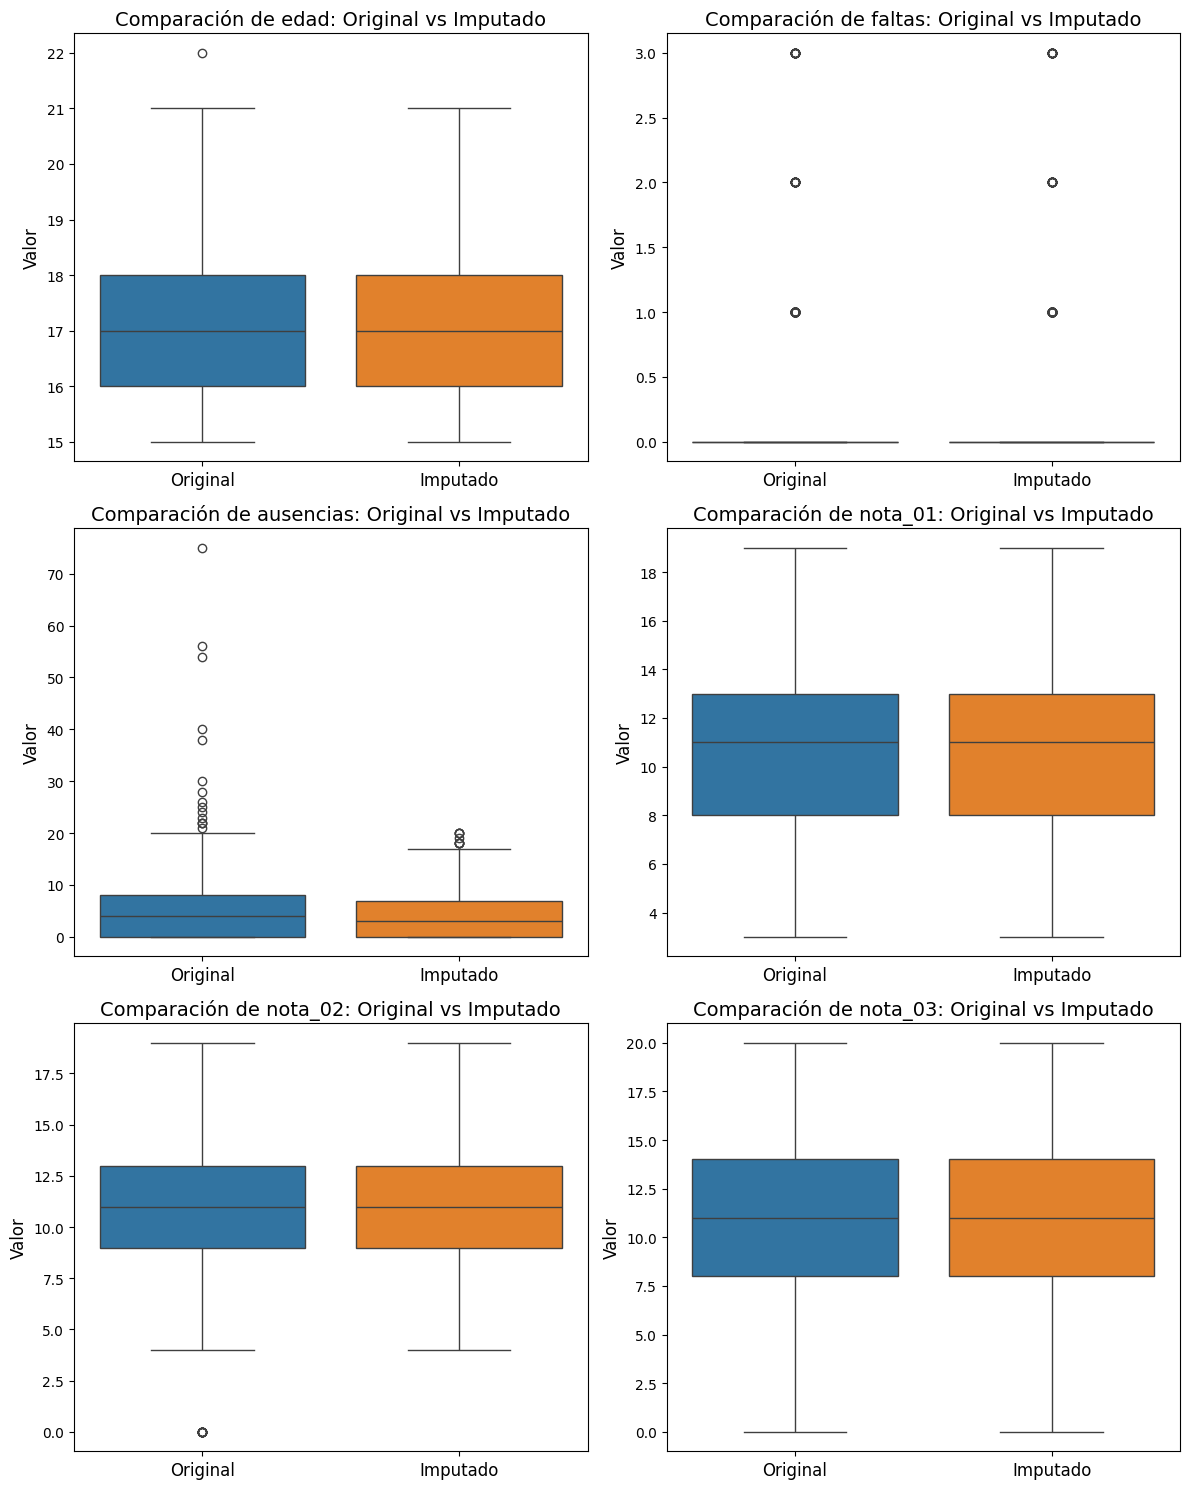

In [ ]:
# Creacion un DataFrame que combine los valores originales e imputados
df_comparison = pd.DataFrame()

for col in numeric_cols:
    df_comparison[f'{col}_original'] = df_calculo_diferencia[col]
    df_comparison[f'{col}_imputed'] = dfc[col]

# Definir el número de filas según el número de variables numéricas
num_vars = len(numeric_cols)
rows = num_vars if num_vars <= 4 else (num_vars // 2) + (num_vars % 2)

# Generar los boxplots comparativos con un diseño más espacioso
plt.figure(figsize=(12, 5 * rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(data=df_comparison[[f'{col}_original', f'{col}_imputed']])
    plt.title(f'Comparación de {col}: Original vs Imputado', fontsize=14)
    plt.xticks([0, 1], ['Original', 'Imputado'], fontsize=12)
    plt.xlabel('')
    plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()

#### Exploración de datos luego de eliminar atípicos

In [ ]:
#Resumen de caracteristicas basicas de la base de datos imputada
visual_check(dfc)

Shape:
 (397, 33) 

Data Types:
 departamento          object
sexo                  object
edad                   int64
direccion             object
t_familia             object
padres_status         object
madre_edu             object
padre_edu             object
madre_trab            object
padre_trab            object
razon                 object
guardian              object
t_examen              object
t_estudio             object
faltas                 int64
soporte_edu_extra     object
soporte_edu_fam       object
monitores             object
actividades_extra     object
preuniversitario      object
postgrado             object
internet              object
relacion_sen          object
relacion_fam          object
tiempo_libre          object
salir_amigos          object
cons_alcohol_sem      object
cons_alcohol_finde    object
salud                 object
ausencias              int64
nota_01                int64
nota_02                int64
nota_03                int64
dtype: obj

,count,mean,std,min,25%,50%,75%,max
edad,397.0,16.692695,1.251775,15.0,16.0,17.0,18.0,21.0
faltas,397.0,0.335013,0.742714,0.0,0.0,0.0,0.0,3.0
ausencias,397.0,4.534005,4.875933,0.0,0.0,3.0,7.0,20.0
nota_01,397.0,10.881612,3.333120,3.0,8.0,11.0,13.0,19.0
nota_02,397.0,11.047859,3.215371,4.0,9.0,11.0,13.0,19.0
nota_03,397.0,10.377834,4.604928,0.0,8.0,11.0,14.0,20.0


In [ ]:
#Resumen de la frecuencia y el ratio de las variables categoricas luego de imputacion
cat_cols = [col for col in dfc.columns if dfc[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(dfc, col, plot=False)

              departamento      Ratio
departamento                         
II                     350  88.161209
MS                      47  11.838791
##########################################
      sexo      Ratio
sexo                 
M      209  52.644836
H      188  47.355164
##########################################
           direccion      Ratio
direccion                      
U                308  77.581864
R                 89  22.418136
##########################################
           t_familia      Ratio
t_familia                      
mayor_3          283  71.284635
menor_e3         114  28.715365
##########################################
               padres_status      Ratio
padres_status                          
J                        355  89.420655
S                         42  10.579345
##########################################
                    madre_edu      Ratio
madre_edu                               
Educación superior        132  33.249370
6° a 9

# Seleccion de variables númericas y categóricas

In [ ]:
#Nivel de significancia entre nota_03 en relacion a todas las variables categoricas, por medio de la ANOVA

categorical_cols = dfc.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    model = ols(f'nota_03 ~ C({col})', data=dfc).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA para la variable '{col}':")
    print(anova_table)
    print("\n" + "="*80 + "\n")

ANOVA para la variable 'departamento':
                      sum_sq     df         F    PR(>F)
C(departamento)    29.156730    1.0  1.376276  0.241443
Residual         8368.168207  395.0       NaN       NaN


ANOVA para la variable 'sexo':
               sum_sq     df         F    PR(>F)
C(sexo)     81.781544    1.0  3.884738  0.049425
Residual  8315.543393  395.0       NaN       NaN


ANOVA para la variable 'direccion':
                   sum_sq     df         F    PR(>F)
C(direccion)   108.682189    1.0  5.179312  0.023392
Residual      8288.642748  395.0       NaN       NaN


ANOVA para la variable 't_familia':
                   sum_sq     df         F    PR(>F)
C(t_familia)    61.904442    1.0  2.933536  0.087542
Residual      8335.420495  395.0       NaN       NaN


ANOVA para la variable 'padres_status':
                       sum_sq     df         F    PR(>F)
C(padres_status)    22.595561    1.0  1.065736  0.302542
Residual          8374.729376  395.0       NaN       NaN


ANOV

Si utilizamos un nivel de significancia de 0.05, podemos concluir que, de todas las variables analizadas, las que parecen tener un efecto significativo en "nota_03" son:

*   postgrado, monitores, internet, relacion_sen, madre_edu, padre_edu, t_estudio, salir_amigos, tiempo_libre, soporte_edu_extra, madre_trab, sexo, direccion


Las demás variables no muestran una influencia significativa en "nota_03", según los resultados del ANOVA.



#### Diagrama de correlacion de las variables

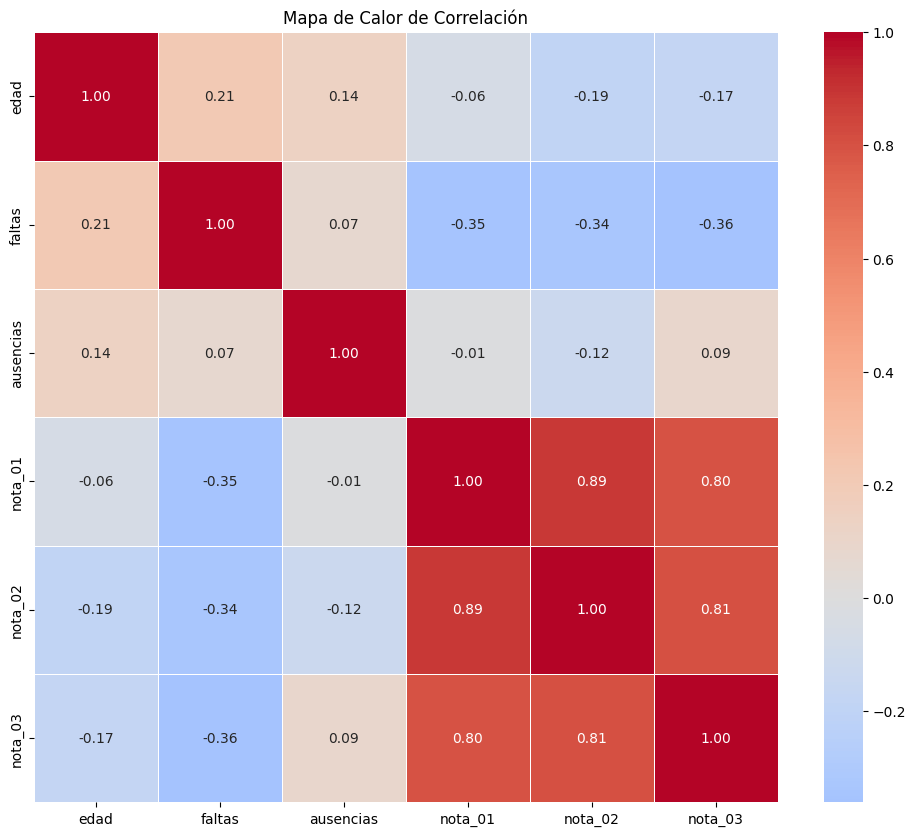

In [ ]:
def graficar_mapa_correlacion(df):
    numeric_vars = df.select_dtypes(include=['number']).columns

    # Calcular la matriz de correlación
    corr_matrix = df[numeric_vars].corr(method='pearson')  # Puedes cambiar 'pearson' por 'spearman'

    # Crear el mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
    plt.title('Mapa de Calor de Correlación')
    plt.show()

graficar_mapa_correlacion(dfc)

Es evidente la alta correlación existente entre las notas 01, 02 y 03.
Incluso, con una recorrelación negativa, mientras más faltas, hay una probabilidad casi del 36% de que la persona saque bajita la nota 03

A pesar de que nota_01 y nota_02, amabas tienen mucha correlación con la variable respuesta nota_0.3 se decidio dejar ambas dado que estan aportando datos relevantes para la elaboracion de un modelo de clasificación

## Pruebas de normalidad de variable respuesta y variables mas correlacionadas


In [ ]:
#Prueba de normalidad estadistica

def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
variables = ['nota_01', 'nota_02', 'nota_03']
prueba_normalidad(dfc, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.9749096618931814, Valor-p: 2.3154350934173543e-06
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.9807156703363015, Valor-p: 3.829613651419873e-05
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.928886915206418, Valor-p: 8.392549249292455e-13
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




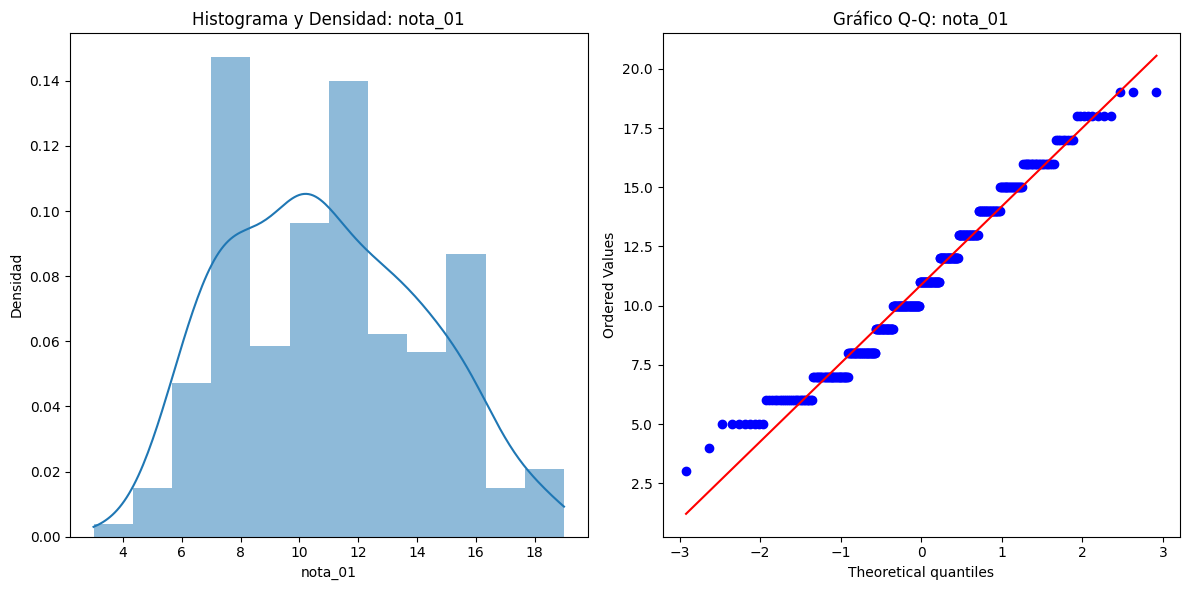

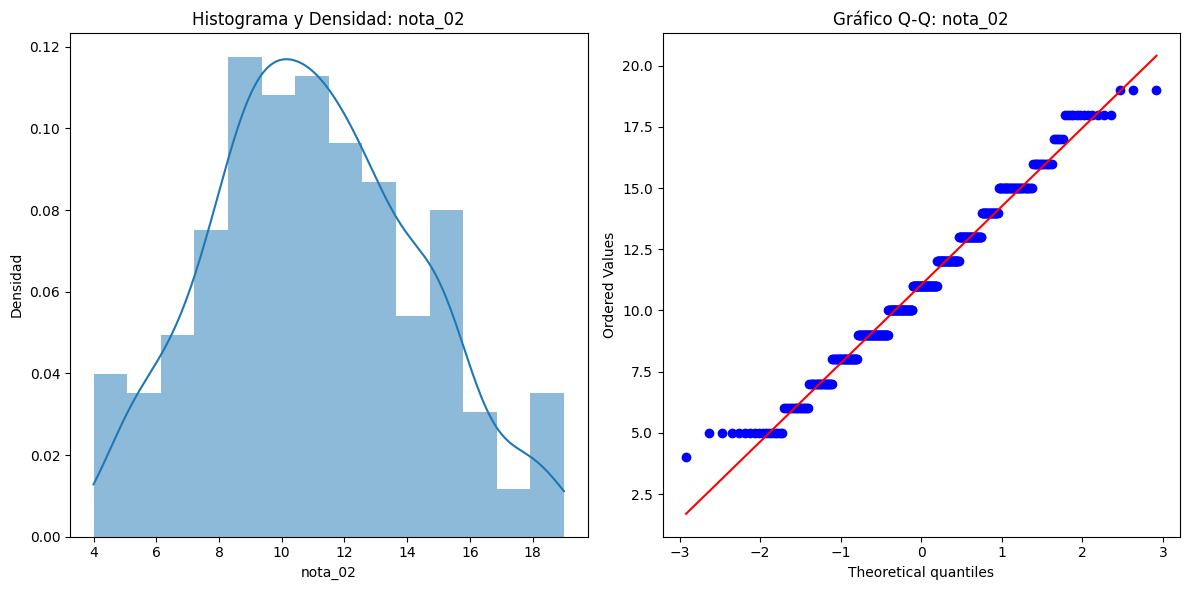

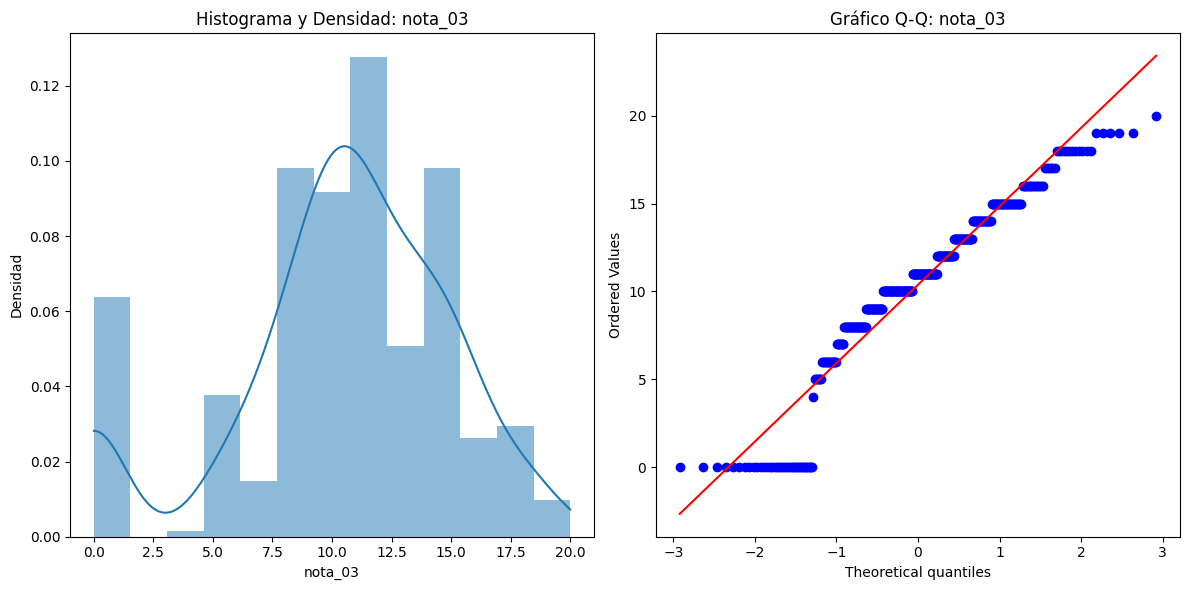

In [ ]:
#Prueba de normalidad grafica

def evaluar_normalidad(df, variables):

    for var in variables:
        plt.figure(figsize=(12, 6))

        # Histograma con línea de densidad
        plt.subplot(1, 2, 1)
        sns.histplot(df[var], kde=True, stat='density', linewidth=0)
        plt.title(f'Histograma y Densidad: {var}')
        plt.xlabel(var)
        plt.ylabel('Densidad')

        # Gráfico Q-Q
        plt.subplot(1, 2, 2)
        stats.probplot(df[var].dropna(), dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q: {var}')

        plt.tight_layout()
        plt.show()

evaluar_normalidad(dfc, variables)

### Transformación de los datos en busca de distribución normal

In [ ]:
# Crear una copia del DataFrame original para realizar transformacion y hacer pruebas
dfc_transformado = dfc.copy()

# Aplicar las transformaciones sobre la copia
dfc_transformado['nota_01'] = np.log1p(dfc_transformado['nota_01'])  # Transformación logarítmica
dfc_transformado['nota_02'] = np.log1p(dfc_transformado['nota_02'])  # Transformación logarítmica
dfc_transformado['nota_03'] = np.log1p(dfc_transformado['nota_03'])  # Transformación logarítmica

dfc_transformado[['nota_01', 'nota_02', 'nota_03']] = StandardScaler().fit_transform(dfc_transformado[['nota_01', 'nota_02', 'nota_03']])

In [ ]:
#Prueba de normalidad estadistica con la transformacion

variables = ['nota_01', 'nota_02', 'nota_03']
def prueba_normalidad(df, variables):

    for var in variables:
        stat, p_value = stats.shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
prueba_normalidad(dfc_transformado, variables)

Prueba de Normalidad de Shapiro-Wilk para nota_01:
Estadístico: 0.9738261301211255, Valor-p: 1.424495599748121e-06
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_02:
Estadístico: 0.9703480412210317, Valor-p: 3.209079648461843e-07
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para nota_03:
Estadístico: 0.645173198034374, Valor-p: 7.007909044936165e-28
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.




***A pesar de aplicar una transformación logarítmica a las variables más significativas, estas no cumplen con el supuesto de normalidad. Por lo tanto, retomaremos el análisis utilizando la base de datos original, "dfc", en la cual no se ha aplicado esta transformación logarítmica***

## Selección de variables definitivas

Después de analizar el comportamiento y la correlación de las variables, se seleccionaron aquellas que tienen mayor impacto en nuestra variable respuesta. Estas son:

**NUMERICAS**: Se escogieron estas variables puesto que eran las que evidenciaban mayor correlacion entre ellas y respecto a la variable respuesta
*   nota_1
*   nota_2
*   nota_3
*   faltas
*   edad


**CATEGORICAS**: La seleccion de estas, fue basada en los resultados de las ANOVAS, que permiten observar el nivel de significancia de las variables categoricas en relacion a la variable numérica "nota_03", además, se tuvo en cuenta para la selección de estas variables la experiencia y previo conocimiento del tema
*   postgrado
*   monitores
*   internet
*   relacion_sen
*   madre_edu
*   padre_edu
*   t_estudio
*   salir_amigos
*   tiempo_libre
*   soporte_edu_extra
*   madre_trab
*   sexo
*   direccion

# Preparación de los datos para el modelo SIN atipicos

## Creacion de nuevo dataframe SIN atipicos

In [ ]:
#Creacion de vectores con variables numericas y categoricas
numericas = ['nota_01', 'nota_02', 'nota_03', 'faltas', 'edad']
df_numericas = dfc[numericas]

categoricas = ['postgrado', 'monitores', 'internet', 'relacion_sen', 'madre_edu','padre_edu', 't_estudio', 'salir_amigos', 'tiempo_libre', 'soporte_edu_extra', 'madre_trab', 'sexo', 'direccion']
df_categoricas = dfc[categoricas]

#Union de vectores para formar el dataframe con el que se hara el modelo
df_final_calculo = pd.concat([df_numericas, df_categoricas], axis=1)
df_final_calculo

,nota_01,nota_02,nota_03,faltas,edad,postgrado,monitores,internet,relacion_sen,madre_edu,padre_edu,t_estudio,salir_amigos,tiempo_libre,soporte_edu_extra,madre_trab,sexo,direccion
0,5,6,6,0,18,si,no,no,no,Educación superior,Educación superior,2 a 5 horas,Alto,Medio,si,en_casa,M,U
1,5,5,6,0,17,si,no,si,no,Primaria hasta 5°,Primaria hasta 5°,2 a 5 horas,Medio,Medio,no,en_casa,M,U
2,7,8,10,3,15,si,si,si,no,Primaria hasta 5°,Primaria hasta 5°,2 a 5 horas,Bajo,Medio,si,en_casa,M,U
3,15,14,15,0,15,si,si,si,si,Educación superior,6° a 9°,5 a 10 horas,Bajo,Bajo,no,salud,M,U
4,6,10,10,0,16,si,si,no,no,10° a 11°,10° a 11°,2 a 5 horas,Bajo,Medio,no,otro,M,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,10,8,7,3,21,si,no,no,no,Primaria hasta 5°,Primaria hasta 5°,< 2 horas,Medio,Muy alto,no,otro,H,R
393,11,12,10,0,18,si,no,si,no,10° a 11°,6° a 9°,< 2 horas,Muy bajo,Alto,no,servicios,H,R
394,8,9,9,0,19,si,no,si,no,Primaria hasta 5°,Primaria hasta 5°,< 2 horas,Medio,Bajo,no,otro,H,U
395,5,6,6,0,18,si,no,no,no,Educación superior,Educación superior,2 a 5 horas,Alto,Medio,si,en_casa,M,U


## Creación modelo de regresión logística SIN atipicos

En este caso, dado que se va a construir un modelo de regresión logística, es fundamental que la variable de respuesta sea categórica. Para cumplir con este requisito, se realizará una transformación adecuada de la variable.

En esta transformación, se ha decidido establecer un umbral en el cual las notas iguales o superiores a 10 se clasificarán como aprobadas (1), mientras que las notas por debajo de este umbral se considerarán reprobadas (0)

In [ ]:
# Transformar nota_03 de numerica a categorica
df_final_calculo['nota_03'] = np.where(df_final_calculo['nota_03'] >= 10, 1, 0)

In [ ]:
#Visualizacion en consola de las variables que quedan
print(df_final_calculo.columns)

Index(['nota_01', 'nota_02', 'nota_03', 'faltas', 'edad', 'postgrado',
       'monitores', 'internet', 'relacion_sen', 'madre_edu', 'padre_edu',
       't_estudio', 'salir_amigos', 'tiempo_libre', 'soporte_edu_extra',
       'madre_trab', 'sexo', 'direccion'],
      dtype='object')


### Dumización

Las variables que tenian solo dos grupos de datos, se dumizaron de manera normal, pero las variables que más de dos grupos de datos, estos grupos se separaron yfueron dumizados de manera individual

In [ ]:
#Dumizacion de todas las variables categoricas
for col in categorical_cols:
    if col not in df_final_calculo.columns:
        continue

    # Obtener las categorías únicas de la columna
    unique_values = df_final_calculo[col].unique()

    if len(unique_values) == 2:
        # Si solo hay dos categorías, mapeamos una a 0 y otra a 1
        df_final_calculo[col] = df_final_calculo[col].map({unique_values[0]: 0, unique_values[1]: 1})
    else:
        # Si hay más de dos categorías, creamos dummies para todas
        dummies = pd.get_dummies(df_final_calculo[col], prefix=col, drop_first=False)

        # Convertir columnas booleanas a 0 y 1 si hay alguna
        dummies = dummies.astype(int)
        df_final_calculo = pd.concat([df_final_calculo.drop(col, axis=1), dummies], axis=1)

boolean_cols = df_final_calculo.select_dtypes(include='bool').columns
df_final_calculo[boolean_cols] = df_final_calculo[boolean_cols].astype(int)

### Escalamiento de variables numericas

Se realizó escalamiento con el fin de normalizar los datos y que estos estuvieran en el mismo rango de valores.

La elección de MinMaxScaler es particularmente útil en modelos de clasificación, como lo es en este caso, donde se busca mantener la estructura original de los datos, asegurar igualdad de relevancia entre las variables y evitar distorsiones causadas por métodos que supongan una distribución normal o que sean demasiado sensibles a los outliers. Ademas da mayor facilidad de interpretación y adaptabilidad de rango.

In [ ]:
# Almacenar variables númericas

numcol = []
for col in df_final_calculo.columns:
    if df_final_calculo[col].dtypes == "int64":
        numcol.append(col)

# Escalamiento de restar el minimo y dividir sobre el rango
scaler = MinMaxScaler()
for col in numcol:
    df_final_calculo[[col]] = scaler.fit_transform(df_final_calculo[[col]])

df_final_calculo.head()

,nota_01,nota_02,nota_03,faltas,edad,postgrado,monitores,internet,relacion_sen,soporte_edu_extra,sexo,direccion,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo
0,0.1250,0.133333,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1250,0.066667,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2500,0.266667,1.0,1.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.7500,0.666667,1.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.1875,0.400000,1.0,0.0,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Separación en base de datos en entrenamiento y prueba

In [ ]:
dfc2 = df_final_calculo.copy() # Crear una copia del dataframe original
x = dfc2.drop("nota_03",axis = 1) # Eliminar la variable que vamos a predecir, que es la nota_03
y = dfc2['nota_03'] # nota_03, variable a predecir

In [ ]:
#Verificación de la base de datos SIN la variable a predecir
x

,nota_01,nota_02,faltas,edad,postgrado,monitores,internet,relacion_sen,soporte_edu_extra,sexo,direccion,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo
0,0.1250,0.133333,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1250,0.066667,0.000000,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2500,0.266667,1.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.7500,0.666667,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.1875,0.400000,0.000000,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.4375,0.266667,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
393,0.5000,0.533333,0.000000,0.500000,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,0.3125,0.333333,0.000000,0.666667,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
395,0.1250,0.133333,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Separacion de los datos en 70% datos de entrenamiento y 30% datos de prueba
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle = True,test_size=0.30, random_state=123)

### Modelo de regresión logística

In [ ]:
#Creacion del modelo de regresion logistica y los modelos de prediccion

model = LogisticRegression(max_iter=200) # definir el modelo
model.fit(x_train,y_train) # entrenar el modelo

y_pred_train = model.predict(x_train) # guardar la predicción para train
y_pred_test = model.predict(x_test) # guardar la predicción para test

In [ ]:
# predicción de test
y_pred_test

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1.])

In [ ]:
# Realidad de test
y_test

,nota_03
150,0.0
42,1.0
120,1.0
102,1.0
293,1.0
...,...
327,1.0
223,1.0
283,1.0
273,1.0


#### Matriz de confusión

[[26 12]
 [ 6 76]]


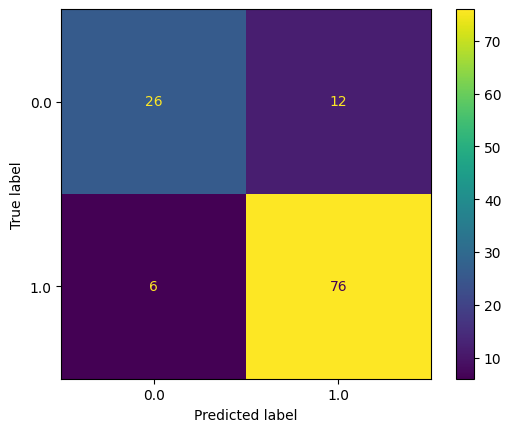

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();
print(cm)

El modelo muestra una alta efectividad para predecir las notas que serán aprobadas, con 76 verdaderos positivos frente a solo 6 falsos negativos. Sin embargo, hay un número moderado de falsos positivos (12), lo que significa que el modelo a veces predice erróneamente que una nota será aprobada cuando no lo será.

En general, el modelo es más confiable para identificar las aprobaciones, pero tiene un margen de error donde puede ser demasiado optimista en algunos casos. Este comportamiento sugiere que si el costo de predecir erróneamente una aprobación es alto, podría ser necesario ajustar el modelo para reducir los falsos positivos.

#### Metricas de prueba

In [ ]:
TP=cm[1,1]  # El modelo dijo que eran 1 y en la realidad son 0, verdaderos positivos - 76
FP=cm[0,1]  # El modelo dijo que eran 1 y en la realidad son 0, falsos positivos - 12
FN=cm[1,0]  # El modelo dijo que eran 0 y en la realidad son 1, falsos negativos - 6
TN=cm[0,0]  # El modelo dijo que eran 0 y en la realidad son 0, verdaderos negativos - 26

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recall (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.85
Precicion: 0.8636363636363636
Recall (Sensibilidad)): 0.926829268292683
F1-score: 0.8941176470588236
Especificidad: 0.6842105263157895


Analizando los resultados de las métricas, es evidente que el modelo muestra un buen rendimiento en general, con una alta precisión y recall, lo que sugiere que es eficaz en la clasificación de instancias positivas. Sin embargo, la especificidad relativamente baja indica que el modelo tiene un área de mejora en la identificación de instancias negativas. Puede mejorar con los pertinentes ajustes, sobretodo para la metrica de especificidad.

#### Metricas de entrenamiento

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=model.classes_) # guardar las clases para la matriz de confusión

TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[0,0]

print(f"Accuracy train: {accuracy_score(y_train, y_pred_train)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recall (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_train, y_pred_train, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy train: 0.9133574007220217
Precicion: 0.9251336898395722
Recall (Sensibilidad)): 0.9453551912568307
F1-score: 0.9351351351351351
Especificidad: 0.851063829787234


El modelo entrenado muestra un buen rendimiento y bien balanceado, con métricas que indican un buen ajuste a los datos de entrenamiento. Tiene una alta precisión, sensibilidad y especificidad, el modelo es capaz de distinguir correctamente tanto las instancias positivas como negativas. Además, el alto F1-score sugiere que el modelo mantiene un equilibrio efectivo entre las métricas de precisión y recall.

**Comparación entrenamiento y prueba**

El modelo muestra una ligera caída en rendimiento al pasar de entrenamiento a prueba, especialmente en la capacidad para identificar instancias negativas (especificidad). Esta diferencia, aunque no crítica, sugiere que el modelo podría mejorarse con algunos ajustes adicionales, como aplicar técnicas para evitar que se ajuste demasiado a los datos de entrenamiento, probarlo con diferentes subconjuntos de datos, o recopilar más datos que representen mejor el problema.

#### Curva ROC

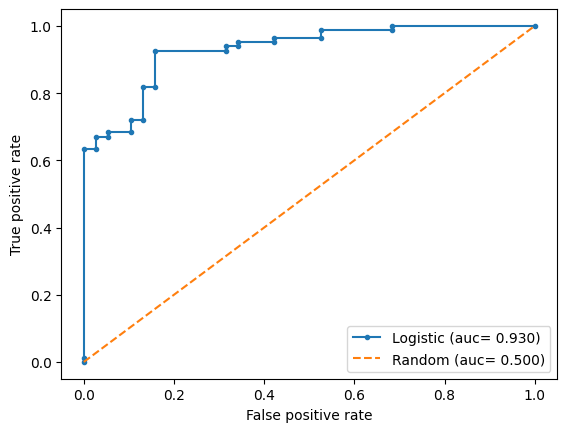

In [ ]:
y_pred = model.predict_proba(x_test)[::,1]
fpr, tpr,_ =roc_curve(y_test, y_pred)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test, y_pred) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (auc= 0.500)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Conclusión de la Curva ROC**

**Desempeño del Modelo:** La curva ROC muestra un AUC de 0.930, lo que indica un excelente desempeño del modelo. Un AUC cercano a 1 significa que el modelo es muy bueno para distinguir entre las clases positivas y negativas.

**Balance entre Tasa de Verdaderos Positivos y Falsos Positivos:** La curva ROC se acerca bastante a la esquina superior izquierda, lo que implica que el modelo tiene una alta tasa de verdaderos positivos (sensibilidad) y una baja tasa de falsos positivos, lo cual es deseable.

**Interpretación Global:** Con un AUC de 0.930, el modelo tiene una alta capacidad predictiva y es eficaz para diferenciar correctamente entre las clases. Esto sugiere que el modelo está bien ajustado y tiene un rendimiento sólido, con un buen equilibrio entre sensibilidad y especificidad.

#MODELO BASE

# Preparación de los datos para el modelo CON atípicos


## Creacion de nuevo dataframe CON atípicos

In [ ]:
#Creacion de vectores con variables numericas y categoricas
numericas = ['nota_01', 'nota_02', 'nota_03', 'faltas', 'edad']
df_numericas = df_calculo_diferencia[numericas]

categoricas = ['postgrado', 'monitores', 'internet', 'relacion_sen', 'madre_edu','padre_edu', 't_estudio', 'salir_amigos', 'tiempo_libre', 'soporte_edu_extra', 'madre_trab', 'sexo', 'direccion']
df_categoricas = df_calculo_diferencia[categoricas]

#Union de vectores para formar el dataframe con el que se hara el modelo
df_final_calculo2 = pd.concat([df_numericas, df_categoricas], axis=1)
df_final_calculo2

,nota_01,nota_02,nota_03,faltas,edad,postgrado,monitores,internet,relacion_sen,madre_edu,padre_edu,t_estudio,salir_amigos,tiempo_libre,soporte_edu_extra,madre_trab,sexo,direccion
0,5,6,6,0,18,si,no,no,no,Educación superior,Educación superior,2 a 5 horas,Alto,Medio,si,en_casa,M,U
1,5,5,6,0,17,si,no,si,no,Primaria hasta 5°,Primaria hasta 5°,2 a 5 horas,Medio,Medio,no,en_casa,M,U
2,7,8,10,3,15,si,si,si,no,Primaria hasta 5°,Primaria hasta 5°,2 a 5 horas,Bajo,Medio,si,en_casa,M,U
3,15,14,15,0,15,si,si,si,si,Educación superior,6° a 9°,5 a 10 horas,Bajo,Bajo,no,salud,M,U
4,6,10,10,0,16,si,si,no,no,10° a 11°,10° a 11°,2 a 5 horas,Bajo,Medio,no,otro,M,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,10,8,7,3,21,si,no,no,no,Primaria hasta 5°,Primaria hasta 5°,< 2 horas,Medio,Muy alto,no,otro,H,R
393,11,12,10,0,18,si,no,si,no,10° a 11°,6° a 9°,< 2 horas,Muy bajo,Alto,no,servicios,H,R
394,8,9,9,0,19,si,no,si,no,Primaria hasta 5°,Primaria hasta 5°,< 2 horas,Medio,Bajo,no,otro,H,U
395,5,6,6,0,18,si,no,no,no,Educación superior,Educación superior,2 a 5 horas,Alto,Medio,si,en_casa,M,U


## Creación modelo de regresión logística CON atípicos

En este caso, dado que se va a construir un modelo de regresión logística, es fundamental que la variable de respuesta sea categórica. Para cumplir con este requisito, se realizará una transformación adecuada de la variable.

En esta transformación, se ha decidido establecer un umbral en el cual las notas iguales o superiores a 10 se clasificarán como aprobadas (1), mientras que las notas por debajo de este umbral se considerarán reprobadas (0)

In [ ]:
# Transformar nota_03 de numerica a categorica
df_final_calculo2['nota_03'] = np.where(df_final_calculo2['nota_03'] >= 10, 1, 0)

In [ ]:
#Visualizacion en consola de las variables que quedan
print(df_final_calculo2.columns)

Index(['nota_01', 'nota_02', 'nota_03', 'faltas', 'edad', 'postgrado',
       'monitores', 'internet', 'relacion_sen', 'madre_edu', 'padre_edu',
       't_estudio', 'salir_amigos', 'tiempo_libre', 'soporte_edu_extra',
       'madre_trab', 'sexo', 'direccion'],
      dtype='object')


### Dumización

Las variables que tenian solo dos grupos de datos, se dumizaron de manera normal, pero las variables que más de dos grupos de datos, estos grupos se separaron yfueron dumizados de manera individual

In [ ]:
#Dumizacion de todas las variables categoricas
for col in categorical_cols:
    if col not in df_final_calculo2.columns:
        continue

    # Obtener las categorías únicas de la columna
    unique_values = df_final_calculo2[col].unique()

    if len(unique_values) == 2:
        # Si solo hay dos categorías, mapeamos una a 0 y otra a 1
        df_final_calculo2[col] = df_final_calculo2[col].map({unique_values[0]: 0, unique_values[1]: 1})
    else:
        # Si hay más de dos categorías, creamos dummies para todas
        dummies = pd.get_dummies(df_final_calculo2[col], prefix=col, drop_first=False)

        # Convertir columnas booleanas a 0 y 1 si hay alguna
        dummies = dummies.astype(int)
        df_final_calculo2 = pd.concat([df_final_calculo2.drop(col, axis=1), dummies], axis=1)

boolean_cols = df_final_calculo2.select_dtypes(include='bool').columns
df_final_calculo2[boolean_cols] = df_final_calculo2[boolean_cols].astype(int)

### Escalamiento de variables numericas

Se realizó escalamiento con el fin de normalizar los datos y que estos estuvieran en el mismo rango de valores.

La elección de MinMaxScaler es particularmente útil en modelos de clasificación, como lo es en este caso, donde se busca mantener la estructura original de los datos, asegurar igualdad de relevancia entre las variables y evitar distorsiones causadas por métodos que supongan una distribución normal o que sean demasiado sensibles a los outliers. Ademas da mayor facilidad de interpretación y adaptabilidad de rango.

In [ ]:
# Almacenar variables númericas

numcol = []
for col in df_final_calculo2.columns:
    if df_final_calculo2[col].dtypes == "int64":
        numcol.append(col)

# Escalamiento de restar el minimo y dividir sobre el rango
scaler = MinMaxScaler()
for col in numcol:
    df_final_calculo2[[col]] = scaler.fit_transform(df_final_calculo2[[col]])

df_final_calculo2.head()

,nota_01,nota_02,nota_03,faltas,edad,postgrado,monitores,internet,relacion_sen,soporte_edu_extra,sexo,direccion,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo
0,0.1250,0.315789,0.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1250,0.263158,0.0,0.0,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2500,0.421053,1.0,1.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.7500,0.736842,1.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.1875,0.526316,1.0,0.0,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Separación en base de datos en entrenamiento y prueba

In [ ]:
dfc3 = df_final_calculo2.copy() # Crear una copia del dataframe original
x2 = dfc3.drop("nota_03",axis = 1) # Eliminar la variable que vamos a predecir, que es la nota_03
y2 = dfc3['nota_03'] # nota_03, variable a predecir

In [ ]:
#Verificación de la base de datos SIN la variable a predecir
x2

,nota_01,nota_02,faltas,edad,postgrado,monitores,internet,relacion_sen,soporte_edu_extra,sexo,direccion,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo
0,0.1250,0.315789,0.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1250,0.263158,0.000000,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2500,0.421053,1.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.7500,0.736842,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.1875,0.526316,0.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.4375,0.421053,1.000000,0.857143,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
393,0.5000,0.631579,0.000000,0.428571,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,0.3125,0.473684,0.000000,0.571429,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
395,0.1250,0.315789,0.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Separacion de los datos en 70% datos de entrenamiento y 30% datos de prueba
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,shuffle = True,test_size=0.30, random_state=123)

### Modelo de regresión logística

In [ ]:
#Creacion del modelo de regresion logistica y los modelos de prediccion

model = LogisticRegression(max_iter=200) # definir el modelo
model.fit(x_train2,y_train2) # entrenar el modelo

y_pred_train2 = model.predict(x_train2) # guardar la predicción para train
y_pred_test2 = model.predict(x_test2) # guardar la predicción para test

In [ ]:
# predicción de test
y_pred_test2

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1.])

In [ ]:
# Realidad de test
y_test2

,nota_03
150,0.0
42,1.0
120,1.0
102,1.0
293,1.0
...,...
327,1.0
223,1.0
283,1.0
273,1.0


#### Matriz de confusión

[[27 11]
 [ 7 75]]


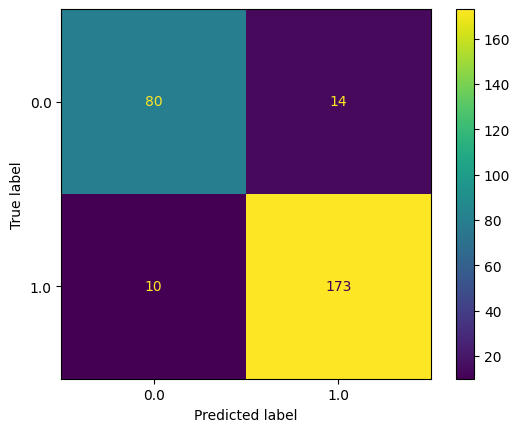

In [ ]:
cm2 = confusion_matrix(y_test2, y_pred_test2, labels=model.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();
print(cm2)

**Conclusión de la Matriz de Confusión**

El modelo muestra una alta efectividad para predecir las notas que serán aprobadas, con 173 verdaderos positivos frente a solo 10 falsos negativos. Sin embargo, hay un número moderado de falsos positivos (14), lo que significa que el modelo a veces predice erróneamente que una nota será aprobada cuando en realidad no lo será.

En general, el modelo es más confiable para identificar las aprobaciones, pero tiene un margen de error donde puede ser demasiado optimista en algunos casos. Este comportamiento sugiere que si el costo de predecir erróneamente una aprobación es alto, podría ser necesario ajustar el modelo para reducir los falsos positivos.

#### Metricas de prueba

In [ ]:
TP2=cm2[1,1]  # El modelo dijo que eran 1 y en la realidad son 0, verdaderos positivos - 76
FP2=cm2[0,1]  # El modelo dijo que eran 1 y en la realidad son 0, falsos positivos - 12
FN2=cm2[1,0]  # El modelo dijo que eran 0 y en la realidad son 1, falsos negativos - 6
TN2=cm2[0,0]  # El modelo dijo que eran 0 y en la realidad son 0, verdaderos negativos - 26

print(f"Accuracy test: {accuracy_score(y_test2, y_pred_test2)}")
print(f'Precicion: {TP2/(TP2+FP2)}')
print(f'Recall (Sensibilidad)): {TP2/(TP2+FN2)}')
print(f'F1-score:', f1_score(y_test2, y_pred_test2, average='binary'))
print(f'Especificidad: {TN2/(FP2+TN2)}')

Accuracy test: 0.85
Precicion: 0.872093023255814
Recall (Sensibilidad)): 0.9146341463414634
F1-score: 0.8928571428571429
Especificidad: 0.7105263157894737


Analizando los resultados de las métricas, es evidente que el modelo muestra un buen rendimiento en general, con una alta precisión (87.21%) y un recall (91.46%), lo que sugiere que es eficaz en la clasificación de instancias positivas. Sin embargo, la especificidad relativamente baja (71.05%) indica que el modelo tiene margen de mejora en la identificación de instancias negativas. Con los ajustes pertinentes, especialmente enfocados en mejorar la especificidad, el rendimiento del modelo podría optimizarse aún más.

#### Metricas de entrenamiento

In [ ]:
cm2 = confusion_matrix(y_train, y_pred_train, labels=model.classes_) # guardar las clases para la matriz de confusión

TP2=cm2[1,1]
FP2=cm2[0,1]
FN2=cm2[1,0]
TN2=cm2[0,0]

print(f"Accuracy train: {accuracy_score(y_train2, y_pred_train2)}")
print(f'Precicion: {TP2/(TP2+FP2)}')
print(f'Recall (Sensibilidad)): {TP2/(TP2+FN2)}')
print(f'F1-score:', f1_score(y_train2, y_pred_train2, average='binary'))
print(f'Especificidad: {TN2/(FP2+TN2)}')

Accuracy train: 0.924187725631769
Precicion: 0.9251336898395722
Recall (Sensibilidad)): 0.9453551912568307
F1-score: 0.9433962264150944
Especificidad: 0.851063829787234


El modelo entrenado muestra un buen rendimiento y está bien balanceado, con métricas que indican un buen ajuste a los datos de entrenamiento. Tiene una alta precisión (92.51%), sensibilidad (94.54%) y especificidad (85.11%), lo que demuestra que el modelo es capaz de distinguir correctamente tanto las instancias positivas como negativas. Además, el alto F1-score (94.34%) sugiere que el modelo mantiene un equilibrio efectivo entre las métricas de precisión y recall.

**Comparación entrenamiento y prueba**

El modelo muestra una ligera caída en el rendimiento al pasar de entrenamiento a prueba, especialmente en la capacidad para identificar instancias negativas (especificidad), que disminuye de 85.11% en el entrenamiento a 71.05% en la prueba. Esta diferencia, aunque no crítica, sugiere que el modelo podría beneficiarse de algunos ajustes adicionales, como aplicar técnicas para evitar un sobreajuste a los datos de entrenamiento, probarlo con diferentes subconjuntos de datos, o recopilar más datos que representen mejor el problema.

#### Curva ROC

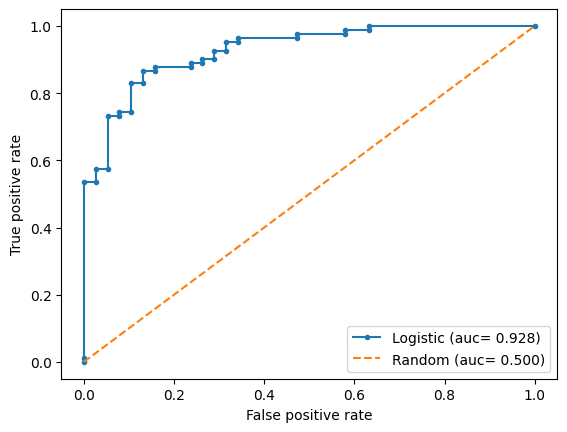

In [ ]:
y_pred2 = model.predict_proba(x_test2)[::,1]
fpr, tpr,_ =roc_curve(y_test2, y_pred2)
# auc=auc(fpr, tpr) #opción 1
auc = roc_auc_score(y_test2, y_pred2) #opción 2
plt.plot(fpr, tpr,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (auc= 0.500)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Conclusión de la Curva ROC**

**Desempeño del Modelo:** La curva ROC muestra un AUC de 0.928, lo que indica un excelente desempeño del modelo. Un AUC cercano a 1 significa que el modelo es muy bueno para distinguir entre las clases positivas y negativas.

**Balance entre Tasa de Verdaderos Positivos y Falsos Positivos:** La curva ROC se acerca bastante a la esquina superior izquierda, lo que implica que el modelo tiene una alta tasa de verdaderos positivos (sensibilidad) y una baja tasa de falsos positivos, lo cual es deseable.

**Interpretación Global:** Con un AUC de 0.928, el modelo tiene una alta capacidad predictiva y es eficaz para diferenciar correctamente entre las clases. Esto sugiere que el modelo está bien ajustado y tiene un rendimiento sólido, con un buen equilibrio entre sensibilidad y especificidad.

# Conclusiones generales - Modelo CON atipícos VS Modelo SIN atipícos

- Ambos modelos, con y sin atípicos, muestran métricas de rendimiento muy similares, con diferencias mínimas en precisión, sensibilidad, especificidad, y AUC ROC. Ambos alcanzan una alta efectividad en la clasificación, lo que sugiere que la eliminación de atípicos no ofrece una ventaja significativa
- La especificidad es un poco más alta en el modelo con atípicos (71.05% frente a 68.42%). Aunque esta diferencia es pequeña, sugiere que el modelo con atípicos podría ser un poco mejor para identificar correctamente las instancias negativas, es decir, aquellas notas que no serán aprobadas.
- El modelo con atípicos tiene un mayor número de falsos positivos (14 frente a 12) y menos falsos negativos (10 frente a 6) en comparación con el modelo sin atípicos. Esto indica que, aunque ambos modelos son efectivos, el modelo con atípicos podría ser ligeramente más propenso a predecir incorrectamente aprobaciones donde no las hay, pero también es un poco más conservador en su predicción de desaprobaciones.

**¿Tiene sentido eliminar los atípicos?**
Dado que las diferencias en las métricas de rendimiento entre el modelo con y sin atípicos son mínimas, no parece haber una justificación fuerte para eliminar los atípicos. Ambos modelos tienen un rendimiento muy similar, y la eliminación de los atípicos no resulta en mejoras significativas en ninguna métrica clave.

# Informe

Utilizando el mejor modelo de regresión lineal, se encontraron los estudiantes que aprobaron el curso.

Se ha decidido establecer un umbral en el cual las notas iguales o superiores a 10 se clasificarán como aprobadas (1), mientras que las notas por debajo de este umbral se considerarán reprobadas (0), dado que en regresion logistica no tenemos notas continuas por eso solo se definio como aprobados y reprobados(0)

In [ ]:
def ganador_curso(modelo):
    pred_list = list(np.concatenate((y_test2, y_train2)))
    aprobaron, reprobaron = [], []
    aprobados = 0
    reprobados = 0

    for i in pred_list:
        if i >= 1:
            aprobados += 1
            aprobaron.append(1)  # Aprobado: 1
        else:
            reprobados += 1
            reprobaron.append(0)  # Reprobado: 0


    print(f'En total hay {aprobados} estudiantes que aprobaron el curso de calculo diferencial')
    print('\n'+'-'*1000)
    print(f'En total hay {reprobados} estudiantes que reprobaron el curso de calculo diferencial')

ganador_curso(y_pred_test2)

En total hay 265 estudiantes que aprobaron el curso de calculo diferencial

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#**ENTREGA # 2**

## Selección y aplicación de algoritmos

### Modelo con selección de variables tipo Wrapper y validación cruzada K-Fold para entrenamiento y prueba

#### Dumización y escalamiento de variables

In [ ]:
# Transformar nota_03 de numerica a categorica
dfc['nota_03'] = np.where(dfc['nota_03'] >= 10, 1, 0)

In [ ]:
#Dumizacion de todas las variables categoricas
categorical_cols = dfc.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if col not in dfc.columns:
        continue

    # Obtener las categorías únicas de la columna
    unique_values = dfc[col].unique()

    if len(unique_values) == 2:
        # Si solo hay dos categorías, mapeamos una a 0 y otra a 1
        dfc[col] = dfc[col].map({unique_values[0]: 0, unique_values[1]: 1})
    else:
        # Si hay más de dos categorías, creamos dummies para todas
        dummies = pd.get_dummies(dfc[col], prefix=col, drop_first=False)

        # Convertir columnas booleanas a 0 y 1 si hay alguna
        dummies = dummies.astype(int)
        dfc = pd.concat([dfc.drop(col, axis=1), dummies], axis=1)

boolean_cols = dfc.select_dtypes(include='bool').columns
dfc[boolean_cols] = dfc[boolean_cols].astype(int)

In [ ]:
print(dfc.shape)
x_int5 = dfc.select_dtypes(include = ["number"]) # filtrar solo variables númericas
x_int5 = x_int5.drop('nota_03', axis = 1)
y = dfc['nota_03']
x_int5.head()

(397, 84)


,departamento,sexo,edad,direccion,t_familia,padres_status,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,ausencias,nota_01,nota_02,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_< 15 min,t_examen_> 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,relacion_fam_Bueno,relacion_fam_Excelente,relacion_fam_Malo,relacion_fam_Muy malo,relacion_fam_Regular,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,cons_alcohol_finde_Medio,cons_alcohol_finde_Muy alto,cons_alcohol_finde_Muy bajo,salud_Bueno,salud_Excelente,salud_Malo,salud_Muy malo,salud_Regular
0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,6,5,6,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,17,0,0,1,0,1,1,0,0,1,0,1,0,4,5,5,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,15,0,1,1,3,0,0,1,0,0,0,1,0,10,7,8,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,15,0,0,1,0,1,1,1,1,0,0,1,1,2,15,14,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,0,16,0,0,1,0,1,1,1,0,0,0,0,0,4,6,10,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [ ]:
y

,nota_03
0,0
1,0
2,1
3,1
4,1
...,...
392,0
393,1
394,0
395,0


In [ ]:
# Normalicemos los datos con el rango
x_int_norm = x_int5.copy(deep = True)  # crear una copia del DataFrame
scaler = MinMaxScaler() # asignar el tipo de normalización
sv = scaler.fit_transform(x_int_norm.iloc[:,:]) # normalizar los datos
x_int_norm.iloc[:,:] = sv # asignar los nuevos datos
x_int_norm.head()

,departamento,sexo,edad,direccion,t_familia,padres_status,faltas,soporte_edu_extra,soporte_edu_fam,monitores,actividades_extra,preuniversitario,postgrado,internet,relacion_sen,ausencias,nota_01,nota_02,madre_edu_10° a 11°,madre_edu_6° a 9°,madre_edu_Educación superior,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_6° a 9°,padre_edu_Educación superior,padre_edu_Ninguno,padre_edu_Primaria hasta 5°,madre_trab_en_casa,madre_trab_otro,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_habilidad,razon_otro,razon_recomendacion,razon_reputacion,guardian_madre,guardian_otro,guardian_padre,t_examen_15 a 30 min,t_examen_30 min a 1 hora,t_examen_< 15 min,t_examen_> 1 hora,t_estudio_2 a 5 horas,t_estudio_5 a 10 horas,t_estudio_< 2 horas,t_estudio_> 10 horas,relacion_fam_Bueno,relacion_fam_Excelente,relacion_fam_Malo,relacion_fam_Muy malo,relacion_fam_Regular,tiempo_libre_Alto,tiempo_libre_Bajo,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Alto,salir_amigos_Bajo,salir_amigos_Medio,salir_amigos_Muy alto,salir_amigos_Muy bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,cons_alcohol_finde_Bajo,cons_alcohol_finde_Medio,cons_alcohol_finde_Muy alto,cons_alcohol_finde_Muy bajo,salud_Bueno,salud_Excelente,salud_Malo,salud_Muy malo,salud_Regular
0,0,0,0.500000,0,0,0,0.0,0,0,0,0,0,0,0,0,0.3,0.1250,0.133333,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0.333333,0,0,1,0.0,1,1,0,0,1,0,1,0,0.2,0.1250,0.066667,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0.000000,0,1,1,1.0,0,0,1,0,0,0,1,0,0.5,0.2500,0.266667,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0.000000,0,0,1,0.0,1,1,1,1,0,0,1,1,0.1,0.7500,0.666667,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,0,0.166667,0,0,1,0.0,1,1,1,0,0,0,0,0,0.2,0.1875,0.400000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


#### Aplicación método Wrapper (Selección de variables)

Este enfoque evalúa la importancia de cada conjunto de variables basado en el rendimiento del modelo, lo que permite identificar de manera efectiva las variables más relevantes para la tarea específica y optimizar la precisión del modelo.

In [ ]:
# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k): #model=modelo que me va a servir de estimador
  rfe = RFE(model, n_features_to_select=k, step=1)# step=1 cada cuanto el toma la decision de tomar una caracteristica
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Selector secuencias utilizando regresión logistica
sfs = SequentialFeatureSelector(LogisticRegression(max_iter=200),
                                n_features_to_select=50, #Se escogieron 50 variables de las 84 resultantes de la dumizacion
                                direction= "forward",  #Se selecciona seleccion hacia delante o eliminacion hacia atras
                                scoring='accuracy')
# Obtener variable seleccionadas
sfs = sfs.fit(x_int_norm, y)
X_new = sfs.support_
df_new = x_int_norm.iloc[:,X_new]
df_new.head()

,departamento,edad,t_familia,padres_status,soporte_edu_fam,actividades_extra,preuniversitario,postgrado,nota_01,nota_02,madre_edu_6° a 9°,madre_edu_Ninguno,madre_edu_Primaria hasta 5°,padre_edu_10° a 11°,padre_edu_Educación superior,padre_edu_Ninguno,madre_trab_en_casa,madre_trab_profesor,madre_trab_salud,madre_trab_servicios,padre_trab_en_casa,padre_trab_otro,padre_trab_profesor,padre_trab_salud,padre_trab_servicios,razon_recomendacion,guardian_madre,guardian_otro,t_examen_30 min a 1 hora,t_examen_> 1 hora,t_estudio_< 2 horas,t_estudio_> 10 horas,relacion_fam_Bueno,relacion_fam_Excelente,relacion_fam_Malo,relacion_fam_Muy malo,relacion_fam_Regular,tiempo_libre_Medio,tiempo_libre_Muy alto,tiempo_libre_Muy bajo,salir_amigos_Bajo,cons_alcohol_sem_Alto,cons_alcohol_sem_Bajo,cons_alcohol_sem_Medio,cons_alcohol_sem_Muy alto,cons_alcohol_sem_Muy bajo,cons_alcohol_finde_Alto,salud_Bueno,salud_Malo,salud_Muy malo
0,0,0.500000,0,0,0,0,0,0,0.1250,0.133333,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0.333333,0,1,1,0,1,0,0.1250,0.066667,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0.000000,1,1,0,0,0,0,0.2500,0.266667,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0.000000,0,1,1,1,0,0,0.7500,0.666667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0.166667,0,1,1,0,0,0,0.1875,0.400000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


Se seleccionó el método Forward, dado que es el que más similitud en cuanto a elección de variables tenia con la anova analizada en el modelo original

#### Validación cruzada (Entrenamiento - Prueba)

In [ ]:
def cross_validation(model, _X, _y, _cv=10):# 10 pliegues sobre el conjunto, factor k
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
# Modelo de regresión logística 2
model_2 = LogisticRegression(class_weight="balanced", random_state=0, max_iter=1000) # modelo para hacer la predicción
# Evaluación del modelo 2
model_2_result = cross_validation(model_2, x_int5, y, 10)
print("\nAccuracy Validation: ", model_2_result['Mean Validation Accuracy'],
      "\nMean Validation Precision: ", model_2_result["Mean Validation Precision"]*100,
      "\nMean Validation F1 Score: ", model_2_result['Mean Validation F1 Score']*100,
      "\nMean Validation Recall: ", model_2_result['Mean Validation Recall']*100,
      )


Accuracy Validation:  85.43589743589743 
Mean Validation Precision:  90.51367845117845 
Mean Validation F1 Score:  88.89810529316988 
Mean Validation Recall:  87.97720797720798


In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_new, y, random_state = 42, test_size= 0.3)

### Curvas de aprendizaje y validación

**Interpretación:**

- Curva de Validación: Si el rendimiento en el conjunto de entrenamiento es alto, pero en el conjunto de validación es bajo, esto indica sobreajuste. Podrías reducir la complejidad del modelo, por ejemplo, limitando la profundidad del árbol. Si el rendimiento es bajo en ambos conjuntos, indica subajuste, y podrías aumentar la complejidad del modelo.

- Curva de Aprendizaje: Si el rendimiento en el conjunto de entrenamiento es mucho mejor que en el conjunto de validación, y ambos siguen mejorando a medida que agregas más datos, puede que necesites más datos de entrenamiento. Si ambas curvas convergen pero a un nivel bajo, el modelo está subajustando, y deberías probar con un modelo más complejo (como aumentar max_depth o disminuir min_samples_split).

En la función de la curva de aprendizaje y validación, es fundamental utilizar una métrica que guíe la búsqueda del rango óptimo de valores para el hiperparámetro en cuestión, con el objetivo de mejorar el rendimiento de dicha métrica. En este caso, el hiperparámetro a optimizar será el "recall", ya que se identificaron mayores oportunidades de mejora en esta métrica durante el análisis inicial.

Max depth

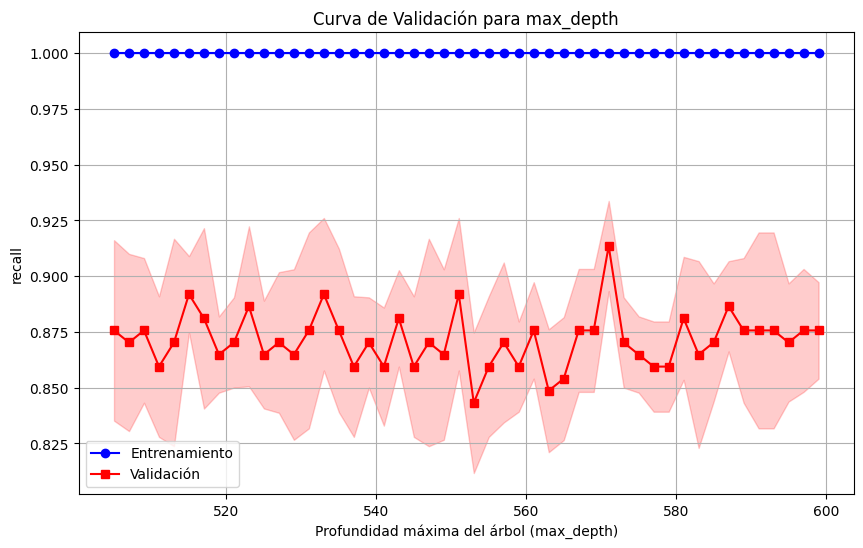

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para max_depth
param_range =np.arange(500,600).tolist()[5::2] # Profundidad entre 30 y 60, incrementando de 2 en 2

# Calcular las curvas de validación (para recall score en este caso)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    x_train3, y_train3,
    param_name="max_depth",  # El hiperparámetro que queremos analizar
    param_range=param_range,  # Rango de valores para max_depth
    cv=5,  # Número de folds para validación cruzada
    scoring='recall'  # Métrica de evaluación: recall
)

# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para max_depth")
plt.xlabel("Profundidad máxima del árbol (max_depth)")
plt.ylabel("recall")
plt.legend(loc="best")
plt.grid()
plt.show()

Como no hay convergencia entre datos de validación y datos de entrenamiento, se decide no usar este hiperparámetro (Max depth)

min_samples_split

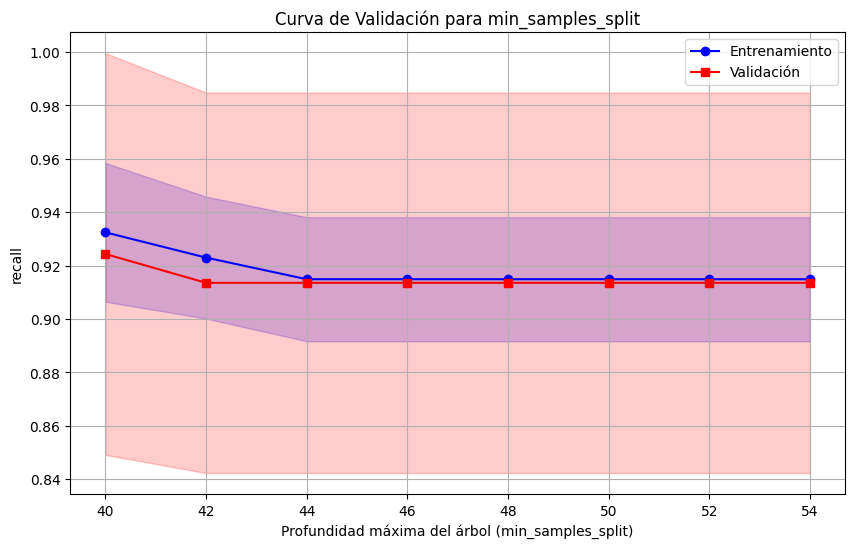

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para min_samples_split
param_range = np.arange(40,55).tolist()[0::2] # Profundidad entre 30 y 60, incrementando de 2 en 2

# Calcular las curvas de validación (para recall score en este caso)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    x_train3, y_train3,
    param_name="min_samples_split",  # El hiperparámetro que queremos analizar
    param_range=param_range,  # Rango de valores para min_samples_split
    cv=5,  # Número de folds para validación cruzada
    scoring='recall'  # Métrica de evaluación: recall
)

# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para min_samples_split")
plt.xlabel("Profundidad máxima del árbol (min_samples_split)")
plt.ylabel("recall")
plt.legend(loc="best")
plt.grid()
plt.show()

El hiperparámetro min_samples_split tiene convergencia entre los valores de 40 y 54 aproximadamente siendo estos los que mejoran la métrica seleccionada, es decir, el recall

max_leaf_nodes

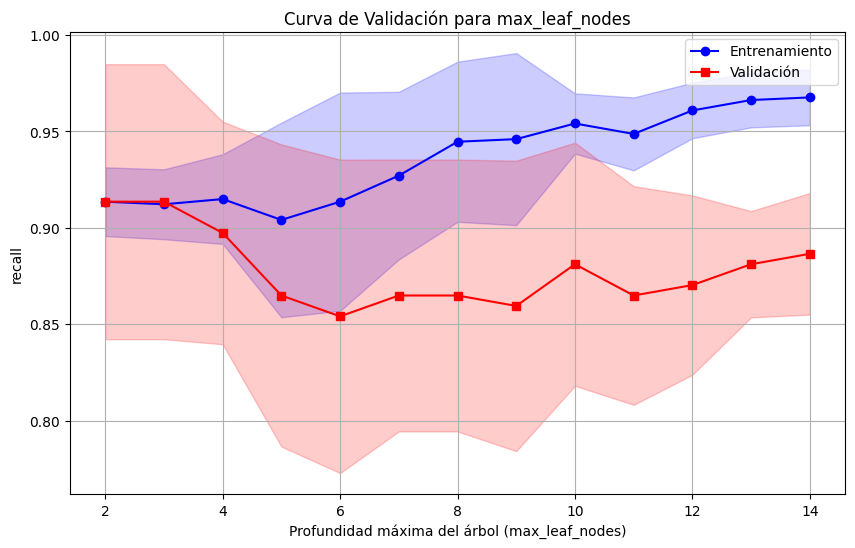

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para max_leaf_nodes
param_range = np.arange(1,15).tolist()[0::1]

# Calcular las curvas de validación (para recall score en este caso)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    x_train3, y_train3,
    param_name="max_leaf_nodes",  # El hiperparámetro que queremos analizar
    param_range=param_range,  # Rango de valores para max_leaf_nodes
    cv=5,  # Número de folds para validación cruzada
    scoring='recall'  # Métrica de evaluación: recall
)

# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para max_leaf_nodes")
plt.xlabel("Profundidad máxima del árbol (max_leaf_nodes)")
plt.ylabel("recall")
plt.legend(loc="best")
plt.grid()
plt.show()

El hiperparámetro max_leaf_nodes tiene convergencia entre los valores de 2 y 8 aproximadamente siendo estos los que mejoran la métrica seleccionada, es decir, el recall

max_features

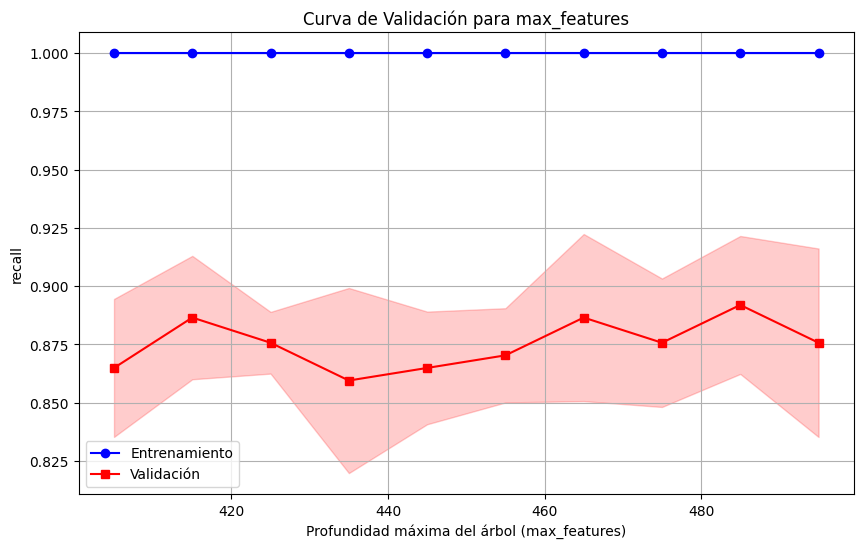

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para max_features
param_range =np.arange(400,500).tolist()[5::10]

# Calcular las curvas de validación (para recall score en este caso)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    x_train3, y_train3,
    param_name="max_features",  # El hiperparámetro que queremos analizar
    param_range=param_range,  # Rango de valores para max_features
    cv=5,  # Número de folds para validación cruzada
    scoring='recall'  # Métrica de evaluación: recall
)

# Calcular el promedio y desviación estándar de los resultados
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar las curvas
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Validación", color="red", marker='s')

# Graficar las áreas de desviación estándar
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Personalizar gráfico
plt.title("Curva de Validación para max_features")
plt.xlabel("Profundidad máxima del árbol (max_features)")
plt.ylabel("recall")
plt.legend(loc="best")
plt.grid()
plt.show()

Como no hay convergencia entre datos de validación y datos de entrenamiento, se decide no usar este hiperparámetro (max_features)

--------------------------------------------------------------------

### Arboles de decisión

**Razones para elegir Árboles de Decisión en un modelo de clasificación:**

- Interpretabilidad: Son fáciles de visualizar e interpretar, ya que las decisiones se representan en forma de un árbol estructurado.

- Manejo de datos mixtos: Los árboles de decisión pueden manejar tanto variables categóricas como continuas sin necesidad de transformaciones o codificaciones complejas.

- Captura de relaciones no lineales: Los árboles de decisión pueden identificar relaciones no lineales entre las variables y el resultado, sin la necesidad de realizar ajustes adicionales.

- Procesos de decisión simples: Ideal para problemas donde se desea comprender cómo se llega a la clasificación final con reglas claras.

- Permiten dividir los datos en subconjuntos basados en preguntas o reglas simples que maximizan la separación entre las clases, lo que facilita asignar una clase específica a cada observación en función de sus características. Este proceso de segmentación binaria sigue criterios como la ganancia de información o el índice Gini, lo que hace que los árboles de decisión sean altamente efectivos para clasificar datos de manera clara y estructurada.

In [ ]:
titulos_columnas = list(df_new.columns)
titulos_columnas = [col for col in titulos_columnas if col != 'nota_03']
respuesta = y.unique().astype(str)

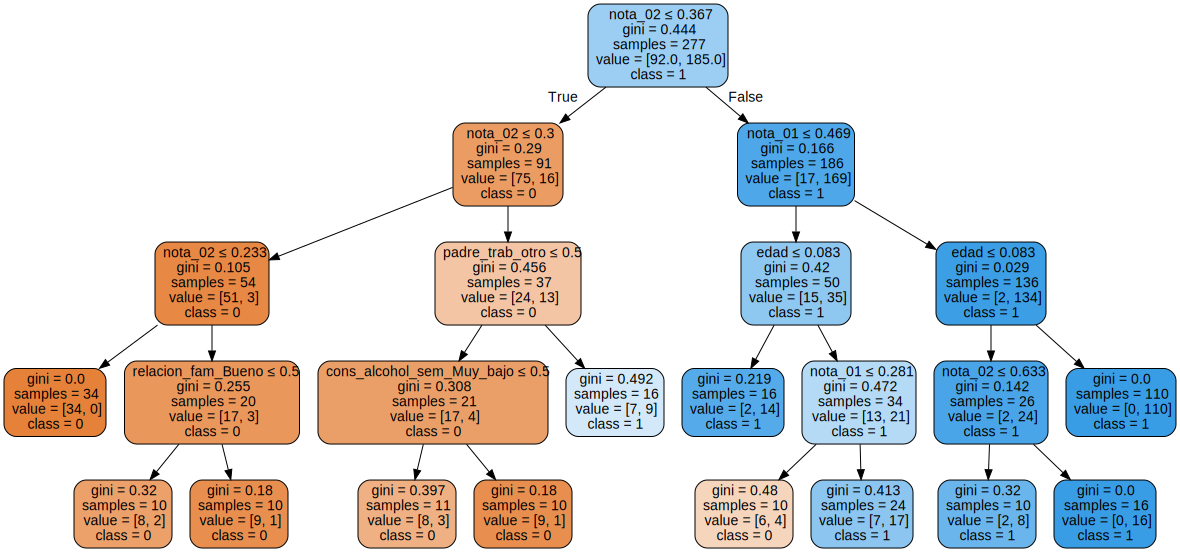

In [ ]:
import re
# Limitar la profundidad del árbol y el tamaño mínimo de las divisiones
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=20, min_samples_leaf=10)
clf.fit(x_train3, y_train3)

# Usar expresiones regulares para sanitizar los nombres de las características
feature_names = [re.sub(r"[^a-zA-Z0-9_]", "_", name) for name in titulos_columnas]
class_names = [re.sub(r"[^a-zA-Z0-9_]", "_", name) for name in respuesta]

# Exportar el gráfico del árbol
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_names,  # Nombres de las características
                                class_names=class_names,      # Clases de 'nota_03'
                                filled=True, rounded=True,
                                special_characters=True)

# Generar y visualizar el gráfico
graph = graphviz.Source(dot_data)
graph

#### Modelo con el metodo de arbol de decisión (Base)

In [ ]:
# fit a model with default parameters
clf = DecisionTreeClassifier()
clf.fit(x_train3,y_train3)
y_pred = clf.predict(x_test3)
y_pred_train = clf.predict(x_train3)

# compute performance on test set
mb_accuracy = accuracy_score(y_test3,y_pred)
mb_precision = precision_score(y_test3,y_pred)
mb_recall = recall_score(y_test3,y_pred)
mb_f1_score = f1_score(y_test3,y_pred)

# compute performance on train set
mb_accuracy3 = accuracy_score(y_train3,y_pred_train)
mb_precision3 = precision_score(y_train3,y_pred_train)
mb_recall3 = recall_score(y_train3,y_pred_train)
mb_f1_score3 = f1_score(y_train3,y_pred_train)

print("TEST")
print('accuracy score: %.2f' % mb_accuracy)
print('precision score: %.2f' % mb_precision)
print('recall score: %.2f' % mb_recall)
print('f1 score: %.2f' % mb_f1_score)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % mb_accuracy3)
print('precision score: %.2f' % mb_precision3)
print('recall score: %.2f' % mb_recall3)
print('f1 score: %.2f' % mb_f1_score3)

TEST
accuracy score: 0.87
precision score: 0.89
recall score: 0.91
f1 score: 0.90
--------------------------------------------------
TRAIN
accuracy score: 1.00
precision score: 1.00
recall score: 1.00
f1 score: 1.00


-------------------------------------------------------------------------------------------

**Afinamiento de hiperparámetros Arboles**

En este caso se comprueba si se realizó bien el entrenamiento del modelo, se hace desde el modelo base y se entrena, luego se compara con el mismo y con los de prueba. Es de esperarse que las métricas de entrenamiento den perfectas, mientras que en el test se espera que el resultado de las métricas sean algo coherentes y ya no sean valores perfectos.

Para el afinamiento de hiperparámetros en modelos de árboles de decisión, se optó por emplear Random Search, Bayesian Optimization y Grid Search, justificando la elección de cada método:

- Eficiencia de Random Search: Este método permite explorar combinaciones de hiperparámetros de manera aleatoria, lo que resulta en una búsqueda más rápida y amplia, especialmente en espacios de alta dimensión.

- Optimización Inteligente con Bayesian Optimization: Este enfoque utiliza un modelo probabilístico para guiar la búsqueda, permitiendo identificar combinaciones de hiperparámetros prometedoras basadas en evaluaciones previas, lo que maximiza la eficacia del ajuste.

- Grid Search para Comparación: Aunque Grid Search puede ser más lento, se utilizó para establecer una referencia sólida al evaluar todas las combinaciones posibles en un rango reducido de hiperparámetros críticos, asegurando que se consideraran las opciones más relevantes.

- Adaptación a la Complejidad del Modelo: Todos los métodos manejan bien la complejidad inherente de los árboles de decisión, permitiendo ajustes precisos de hiperparámetros sin perder eficiencia.

- Flexibilidad en la Búsqueda: La combinación de estos métodos ofrece un enfoque flexible, permitiendo explorar diferentes configuraciones y encontrar el mejor rendimiento sin restricciones estrictas sobre el espacio de búsqueda.

##### Afinamiento hiperparametros modelo arbol de decisión (Grid Search)

In [ ]:
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'min_samples_split':np.arange(40,55).tolist()[0::1],
              'max_leaf_nodes':np.arange(2,8).tolist()[0::1]}

# create an instance of the grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
g1.fit(x_train3,y_train3) #En este caso se decidio entrenar el modelo con los datos de
                            #test y train y no con el dataset completo
gs_duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params1 = g1.best_params_
cls_params1

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



{'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 40}

In [ ]:
# compute performance on test set
model = g1.best_estimator_
y_pred = model.predict(x_test3)
y_pred_train = model.predict(x_train3)

# compute performance on test set
gs_accuracy = accuracy_score(y_test3,y_pred)
gs_precision = precision_score(y_test3,y_pred)
gs_recall = recall_score(y_test3,y_pred)
gs_f1_score = f1_score(y_test3,y_pred)

# compute performance on train set
gs_accuracy3 = accuracy_score(y_train3,y_pred_train)
gs_precision3 = precision_score(y_train3,y_pred_train)
gs_recall3 = recall_score(y_train3,y_pred_train)
gs_f1_score3 = f1_score(y_train3,y_pred_train)

print("TEST")
print('accuracy score: %.2f' % gs_accuracy)
print('precision score: %.2f' % gs_precision)
print('recall score: %.2f' % gs_recall)
print('f1 score: %.2f' % gs_f1_score)
print('computation time: %.2f' % gs_duration)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % gs_accuracy3)
print('precision score: %.2f' % gs_precision3)
print('recall score: %.2f' % gs_recall3)
print('f1 score: %.2f' % gs_f1_score3)
print('computation time: %.2f' % gs_duration)

TEST
accuracy score: 0.90
precision score: 0.95
recall score: 0.90
f1 score: 0.92
computation time: 8.90
--------------------------------------------------
TRAIN
accuracy score: 0.88
precision score: 0.91
recall score: 0.91
f1 score: 0.91
computation time: 8.90


##### Afinamiento hiperparametros modelo arbol de decisión (Random search)


In [ ]:
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'min_samples_split':np.arange(40,55).tolist()[0::1],
              'max_leaf_nodes':np.arange(2,8).tolist()[0::1]}

# create an instance of the randomized search object
r1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=80, random_state=42, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
r1.fit(x_train3,y_train3)
rs_duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r1.best_params_
cls_params2['min_samples_split'] = np.ceil(cls_params2['min_samples_split']*x_train3.shape[0])
cls_params2

{'min_samples_split': 12188.0, 'max_leaf_nodes': 3, 'criterion': 'gini'}

In [ ]:
# compute performance on test set
model = r1.best_estimator_
y_pred = model.predict(x_test3)
y_pred_train = model.predict(x_train3)

# compute performance on test set
rs_accuracy = accuracy_score(y_test3,y_pred)
rs_precision = precision_score(y_test3,y_pred)
rs_recall = recall_score(y_test3,y_pred)
rs_f1_score = f1_score(y_test3,y_pred)

# compute performance on train set
rs_accuracy3 = accuracy_score(y_train3,y_pred_train)
rs_precision3 = precision_score(y_train3,y_pred_train)
rs_recall3 = recall_score(y_train3,y_pred_train)
rs_f1_score3 = f1_score(y_train3,y_pred_train)

print("TEST")
print('accuracy score: %.2f' % rs_accuracy)
print('precision score: %.2f' % rs_precision)
print('recall score: %.2f' % rs_recall)
print('f1 score: %.2f' % rs_f1_score)
print('computation time: %.2f' % rs_duration)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % rs_accuracy3)
print('precision score: %.2f' % rs_precision3)
print('recall score: %.2f' % rs_recall3)
print('f1 score: %.2f' % rs_f1_score3)
print('computation time: %.2f' % rs_duration)

TEST
accuracy score: 0.90
precision score: 0.95
recall score: 0.90
f1 score: 0.92
computation time: 2.12
--------------------------------------------------
TRAIN
accuracy score: 0.88
precision score: 0.91
recall score: 0.91
f1 score: 0.91
computation time: 2.12


##### Afinamiento hiperparametros modelo arbol de decisión (Bayesian Search)

In [ ]:
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'min_samples_split':np.arange(40,55).tolist()[0::1],
              'max_leaf_nodes':np.arange(2,8).tolist()[0::1]}

# create an instance of the bayesian search object
b1 = BayesSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
b1.fit(x_train3,y_train3)
by_duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params3 = b1.best_params_
cls_params3['min_samples_split'] = np.ceil(cls_params3['min_samples_split']*x_train3.shape[0])
cls_params3

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



OrderedDict([('criterion', 'entropy'),
             ('max_leaf_nodes', 6),
             ('min_samples_split', 14681.0)])

In [ ]:
# compute performance on test set
model = b1.best_estimator_
y_pred = model.predict(x_test3)
y_pred_train = model.predict(x_train3)

# compute performance on test set
by_accuracy = accuracy_score(y_test3,y_pred)
by_precision = precision_score(y_test3,y_pred)
by_recall = recall_score(y_test3,y_pred)
by_f1_score = f1_score(y_test3,y_pred)

# compute performance on train set
by_accuracy3 = accuracy_score(y_train3,y_pred_train)
by_precision3 = precision_score(y_train3,y_pred_train)
by_recall3 = recall_score(y_train3,y_pred_train)
by_f1_score3 = f1_score(y_train3,y_pred_train)

print("TEST")
print('accuracy score: %.2f' % by_accuracy)
print('precision score: %.2f' % by_precision)
print('recall score: %.2f' % by_recall)
print('f1 score: %.2f' % by_f1_score)
print('computation time: %.2f' % by_duration)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % by_accuracy3)
print('precision score: %.2f' % by_precision3)
print('recall score: %.2f' % by_recall3)
print('f1 score: %.2f' % by_f1_score3)
print('computation time: %.2f' % by_duration)

TEST
accuracy score: 0.90
precision score: 0.95
recall score: 0.90
f1 score: 0.92
computation time: 1.58
--------------------------------------------------
TRAIN
accuracy score: 0.88
precision score: 0.91
recall score: 0.91
f1 score: 0.91
computation time: 1.58


#### Resultados arboles de decisión

In [ ]:
# guardar resultados
results_class = pd.DataFrame([['Modelo Base AD', mb_accuracy3, mb_accuracy, (mb_accuracy-mb_accuracy3) * 100, mb_precision3, mb_precision, (mb_precision-mb_precision3) * 100, mb_recall3, mb_recall, (mb_recall-mb_recall3) * 100,
     mb_f1_score3,  mb_f1_score, (mb_f1_score - mb_f1_score3) * 100],
    ['grid search AD', gs_accuracy3, gs_accuracy, (gs_accuracy-gs_accuracy3) * 100, gs_precision3, gs_precision, (gs_precision-gs_precision3) * 100, gs_recall3, gs_recall, (gs_recall-gs_recall3) * 100,
     gs_f1_score3,  gs_f1_score, (gs_f1_score - gs_f1_score3) * 100],
    ['random search AD', rs_accuracy3, rs_accuracy, (rs_accuracy-rs_accuracy3) * 100, rs_precision3, rs_precision, (rs_precision-rs_precision3) * 100, rs_recall3, rs_recall, (rs_recall-rs_recall3) * 100,
     rs_f1_score3,  rs_f1_score, (rs_f1_score - rs_f1_score3) * 100],
    ['bayesian search AD', by_accuracy3, by_accuracy, (by_accuracy-by_accuracy3) * 100, by_precision3, by_precision, (by_precision-by_precision3) * 100, by_recall3, by_recall, (by_recall-by_recall3) * 100,
     by_f1_score3,  by_f1_score, (by_f1_score - by_f1_score3) * 100]],
             columns = ['type','accuracy_test', 'accuracy_train', 'Diferen_accuracy', 'precision_test', 'precision_train', 'Diferen_precision',
              'recall_test', 'recall_train', 'Diferen_recall', 'f1_score_test', 'f1_score_train','Diferen_f1_score'])


# Formatear a tres decimales
results_class2 = results_class.round(3)

# Agregar el símbolo de porcentaje a las columnas que empiezan con 'Diferen'
for col in results_class2.columns:
    if col.startswith('Diferen'):
        results_class2[col] = results_class2[col].astype(str) + '%'

results_class2


,type,accuracy_test,accuracy_train,Diferen_accuracy,precision_test,precision_train,Diferen_precision,recall_test,recall_train,Diferen_recall,f1_score_test,f1_score_train,Diferen_f1_score
0,Modelo Base AD,1.000,0.867,-13.333%,1.000,0.890,-10.976%,1.000,0.912,-8.75%,1.000,0.901,-9.877%
1,grid search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
2,random search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
3,bayesian search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%


El análisis de estos resultados se encuentra al final en la tabla general de resultados

In [ ]:
cm2 = confusion_matrix(y_test2, y_pred_test2, labels=model.classes_)
TP2 = cm2[1, 1]  # Verdaderos positivos
FP2 = cm2[0, 1]  # Falsos positivos
FN2 = cm2[1, 0]  # Falsos negativos
TN2 = cm2[0, 0]  # Verdaderos negativos
accuracy2 = accuracy_score(y_test2, y_pred_test2)
precision2 = TP2 / (TP2 + FP2) if (TP2 + FP2) > 0 else 0
recall2 = TP2 / (TP2 + FN2) if (TP2 + FN2) > 0 else 0
f1_score2 = f1_score(y_test2, y_pred_test2, average='binary')
specificity2 = TN2 / (FP2 + TN2) if (FP2 + TN2) > 0 else 0

cm3 = confusion_matrix(y_train2, y_pred_train2, labels=model.classes_)
TP3 = cm3[1, 1]  # Verdaderos positivos
FP3 = cm3[0, 1]  # Falsos positivos
FN3 = cm3[1, 0]  # Falsos negativos
TN3 = cm3[0, 0]  # Verdaderos negativos
accuracy3 = accuracy_score(y_train2, y_pred_train2)
precision3 = TP3 / (TP3 + FP3) if (TP3 + FP3) > 0 else 0
recall3 = TP3 / (TP3 + FN3) if (TP3 + FN3) > 0 else 0
f1_score3 = f1_score(y_train2, y_pred_train2, average='binary')
specificity3 = TN3 / (FP3 + TN3) if (FP3 + TN3) > 0 else 0

results_class = pd.DataFrame([
    ['Modelo ORIGINAL', accuracy3, accuracy2, (accuracy2-accuracy3) * 100, precision3, precision2, (precision2-precision3) * 100,
     recall3, recall2, (recall2-recall3) * 100, f1_score3, f1_score2, (f1_score2-f1_score3) * 100],
    ['Modelo cruzada y wrapper', (model_2_result['Mean Training Accuracy']/100), (model_2_result['Mean Validation Accuracy']/100),
     ((model_2_result['Mean Validation Accuracy']/100)-(model_2_result['Mean Training Accuracy']/100)) * 100, model_2_result["Mean Training Precision"],
     model_2_result["Mean Validation Precision"], (model_2_result["Mean Validation Precision"]-model_2_result["Mean Training Precision"]) * 100,
     model_2_result['Mean Training F1 Score'],  model_2_result['Mean Validation F1 Score'], (model_2_result['Mean Validation F1 Score']-model_2_result['Mean Training F1 Score']) * 100,
     model_2_result['Mean Training Recall'], model_2_result['Mean Validation Recall'], (model_2_result['Mean Validation Recall']-model_2_result['Mean Training Recall']) * 100],
    ['Modelo Base AD', mb_accuracy3, mb_accuracy, (mb_accuracy-mb_accuracy3) * 100, mb_precision3, mb_precision, (mb_precision-mb_precision3) * 100, mb_recall3, mb_recall, (mb_recall-mb_recall3) * 100,
     mb_f1_score3,  mb_f1_score, (mb_f1_score - mb_f1_score3) * 100],
    ['grid search AD', gs_accuracy3, gs_accuracy, (gs_accuracy-gs_accuracy3) * 100, gs_precision3, gs_precision, (gs_precision-gs_precision3) * 100, gs_recall3, gs_recall, (gs_recall-gs_recall3) * 100,
     gs_f1_score3,  gs_f1_score, (gs_f1_score - gs_f1_score3) * 100],
    ['random search AD', rs_accuracy3, rs_accuracy, (rs_accuracy-rs_accuracy3) * 100, rs_precision3, rs_precision, (rs_precision-rs_precision3) * 100, rs_recall3, rs_recall, (rs_recall-rs_recall3) * 100,
     rs_f1_score3,  rs_f1_score, (rs_f1_score - rs_f1_score3) * 100],
    ['bayesian search AD', by_accuracy3, by_accuracy, (by_accuracy-by_accuracy3) * 100, by_precision3, by_precision, (by_precision-by_precision3) * 100, by_recall3, by_recall, (by_recall-by_recall3) * 100,
     by_f1_score3,  by_f1_score, (by_f1_score - by_f1_score3) * 100]],
                          columns = ['type','accuracy_test', 'accuracy_train', 'Diferen_accuracy', 'precision_test', 'precision_train', 'Diferen_precision',
              'recall_test', 'recall_train', 'Diferen_recall', 'f1_score_test', 'f1_score_train','Diferen_f1_score'])

# Formatear a tres decimales
results_class2 = results_class.round(3)

# Agregar el símbolo de porcentaje a las columnas que empiezan con 'Diferen'
for col in results_class2.columns:
    if col.startswith('Diferen'):
        results_class2[col] = results_class2[col].astype(str) + '%'

results_class2



,type,accuracy_test,accuracy_train,Diferen_accuracy,precision_test,precision_train,Diferen_precision,recall_test,recall_train,Diferen_recall,f1_score_test,f1_score_train,Diferen_f1_score
0,Modelo ORIGINAL,0.924,0.850,-7.419%,0.931,0.872,-5.876%,0.956,0.915,-4.165%,0.943,0.893,-5.054%
1,Modelo cruzada y wrapper,0.956,0.854,-10.17%,0.992,0.905,-8.691%,0.966,0.889,-7.724%,0.942,0.880,-6.194%
2,Modelo Base AD,1.000,0.867,-13.333%,1.000,0.890,-10.976%,1.000,0.912,-8.75%,1.000,0.901,-9.877%
3,grid search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
4,random search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
5,bayesian search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%


El análisis de estos resultados se encuentra al final en la tabla general de resultados

### Bosques aleatorios

**Razones para elegir Bosques Aleatorios en un modelo de clasificación:**

- Mayor robustez: Los bosques aleatorios reducen el riesgo de sobreajuste al combinar múltiples árboles y promediar sus resultados, lo que ofrece una clasificación más precisa y generalizable.

- Mejor manejo del ruido: Al crear varios árboles con diferentes subconjuntos de datos, los bosques aleatorios son menos sensibles al ruido y a datos atípicos.

- Reducción de la varianza: El proceso de crear varios árboles disminuye la varianza del modelo, lo que conduce a una mayor estabilidad en las predicciones.

- Escalabilidad y rendimiento: Los bosques aleatorios son capaces de manejar grandes volúmenes de datos y funcionan bien con conjuntos de datos con muchas variables.

- Uso eficiente de características: Selecciona aleatoriamente subconjuntos de características en cada árbol, lo que mejora el rendimiento en conjuntos de datos con muchas variables irrelevantes o correlacionadas.

- Capacidad para evitar el sobreajuste: Gracias a la técnica de "bagging" (ensamblaje de bootstrap), se reduce la tendencia de los árboles de decisión individuales a sobreajustarse a los datos de entrenamiento.

En general, combinan las predicciones de múltiples árboles de decisión mediante votación, lo que mejora la precisión general y reduce la varianza. Este enfoque hace que sean menos propensos a sobreajustarse, proporcionando clasificaciones más robustas y confiables en datos no vistos.

#### Modelo con el metodo de bosques aleatorios(Base)

In [ ]:
# fit a model with default parameters
BoA = RandomForestClassifier()
BoA.fit(x_train3,y_train3)
y_pred2 = BoA.predict(x_test3)
y_pred_train = BoA.predict(x_train3)

# compute performance on test set
mb_accuracy2 = accuracy_score(y_test3,y_pred2)
mb_precision2 = precision_score(y_test3,y_pred2)
mb_recall2 = recall_score(y_test3,y_pred2)
mb_f1_score2 = f1_score(y_test3,y_pred2)

# compute performance on train set
mb_accuracy4 = accuracy_score(y_train3,y_pred_train)
mb_precision4 = precision_score(y_train3,y_pred_train)
mb_recall4 = recall_score(y_train3,y_pred_train)
mb_f1_score4 = f1_score(y_train3,y_pred_train)

print("TEST")
print('accuracy score: %.2f' % mb_accuracy2)
print('precision score: %.2f' % mb_precision2)
print('recall score: %.2f' % mb_recall2)
print('f1 score: %.2f' % mb_f1_score2)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % mb_accuracy4)
print('precision score: %.2f' % mb_precision4)
print('recall score: %.2f' % mb_recall4)
print('f1 score: %.2f' % mb_f1_score4)

TEST
accuracy score: 0.90
precision score: 0.95
recall score: 0.90
f1 score: 0.92
--------------------------------------------------
TRAIN
accuracy score: 1.00
precision score: 1.00
recall score: 1.00
f1 score: 1.00


-------------------------------------------------------------------------------------------

**Afinamiento de hiperparámetros Bosques**

Para el afinamiento de hiperparámetros en modelos de bosques aleatorios, se ha optado por utilizar los métodos de Random Search y Bayesian Optimization debido a su eficiencia y menor costo computacional en comparación con otras estrategias, como el Grid Search.

- Eficiencia en la Exploración: Random Search evalúa combinaciones de hiperparámetros de manera aleatoria, permitiendo una exploración rápida y amplia del espacio.

- Rendimiento en Dimensiones Elevadas: En comparación con Grid Search, Random Search es más efectivo en espacios con múltiples hiperparámetros, reduciendo el tiempo de cómputo.

- Optimización Inteligente: Bayesian Optimization guía la búsqueda utilizando un modelo probabilístico, lo que ayuda a identificar combinaciones prometedoras basándose en evaluaciones previas.

- Manejo de Complejidad: Ambos métodos son menos sensibles a la complejidad del modelo, lo que permite ajustar hiperparámetros sin perder eficiencia.

- Flexibilidad: Ofrecen adaptabilidad para explorar diferentes configuraciones de bosques aleatorios sin requerir suposiciones estrictas sobre el espacio de búsqueda.

##### Afinamiento hiperparametros modelo abosques aleatorios (Random search)


In [ ]:
# setup parameter space
parameters = {'n_estimators':np.arange(90,110).tolist()[0::2],
              'criterion':['gini','entropy'],
              'min_samples_split':np.arange(40,55).tolist()[0::1],
              'max_leaf_nodes':np.arange(2,8).tolist()[0::1]}

# create an instance of the randomized search object
r1 = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5, n_iter=80, random_state=42, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
r1.fit(x_train3,y_train3)
rs_duration2 = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r1.best_params_
cls_params2['min_samples_split'] = np.ceil(cls_params2['min_samples_split']*x_train3.shape[0])
cls_params2

{'n_estimators': 92,
 'min_samples_split': 14404.0,
 'max_leaf_nodes': 6,
 'criterion': 'gini'}

In [ ]:
# compute performance on test set
model = r1.best_estimator_
y_pred2 = model.predict(x_test3)
y_pred_train = model.predict(x_train3)

# compute performance on test set
rs_accuracy2 = accuracy_score(y_test3,y_pred2)
rs_precision2 = precision_score(y_test3,y_pred2)
rs_recall2 = recall_score(y_test3,y_pred2)
rs_f1_score2 = f1_score(y_test3,y_pred2)

# compute performance on train set
rs_accuracy4 = accuracy_score(y_train3,y_pred_train)
rs_precision4 = precision_score(y_train3,y_pred_train)
rs_recall4 = recall_score(y_train3,y_pred_train)
rs_f1_score4 = f1_score(y_train3,y_pred_train)


print("TEST")
print('accuracy score: %.2f' % rs_accuracy2)
print('precision score: %.2f' % rs_precision2)
print('recall score: %.2f' % rs_recall2)
print('f1 score: %.2f' % rs_f1_score2)
print('computation time: %.2f' % rs_duration2)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % rs_accuracy4)
print('precision score: %.2f' % rs_precision4)
print('recall score: %.2f' % rs_recall4)
print('f1 score: %.2f' % rs_f1_score4)
print('computation time: %.2f' % rs_duration2)

TEST
accuracy score: 0.89
precision score: 0.94
recall score: 0.90
f1 score: 0.92
computation time: 62.71
--------------------------------------------------
TRAIN
accuracy score: 0.88
precision score: 0.89
recall score: 0.94
f1 score: 0.91
computation time: 62.71


##### Afinamiento hiperparametros modelo bosques aleatorios (Bayesian Search)

In [ ]:
# setup parameter space
parameters = {'n_estimators':np.arange(90,110).tolist()[0::2],
              'criterion':['gini','entropy'],
              'min_samples_split':np.arange(40,55).tolist()[0::1],
              'max_leaf_nodes':np.arange(2,8).tolist()[0::1]}

# create an instance of the bayesian search object
b1 = BayesSearchCV(RandomForestClassifier(), parameters, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
b1.fit(x_train3,y_train3)
by_duration2 = time.time() - start_time

# show best parameter configuration found for classifier
cls_params3 = b1.best_params_
cls_params3['min_samples_split'] = np.ceil(cls_params3['min_samples_split']*x_train3.shape[0])
cls_params3

OrderedDict([('criterion', 'gini'),
             ('max_leaf_nodes', 7),
             ('min_samples_split', 13019.0),
             ('n_estimators', 106)])

In [ ]:
# compute performance on test set
model = b1.best_estimator_
y_pred2 = model.predict(x_test3)
y_pred_train = model.predict(x_train3)

# compute performance on test set
by_accuracy2 = accuracy_score(y_test3,y_pred2)
by_precision2 = precision_score(y_test3,y_pred2)
by_recall2 = recall_score(y_test3,y_pred2)
by_f1_score2 = f1_score(y_test3,y_pred2)

# compute performance on train set
by_accuracy4 = accuracy_score(y_train3,y_pred_train)
by_precision4 = precision_score(y_train3,y_pred_train)
by_recall4 = recall_score(y_train3,y_pred_train)
by_f1_score4 = f1_score(y_train3,y_pred_train)

print("TEST")
print('accuracy score: %.2f' % by_accuracy2)
print('precision score: %.2f' % by_precision2)
print('recall score: %.2f' % by_recall2)
print('f1 score: %.2f' % by_f1_score2)
print('computation time: %.2f' % by_duration2)
print('-'*50)
print("TRAIN")
print('accuracy score: %.2f' % by_accuracy4)
print('precision score: %.2f' % by_precision4)
print('recall score: %.2f' % by_recall4)
print('f1 score: %.2f' % by_f1_score4)
print('computation time: %.2f' % by_duration2)

TEST
accuracy score: 0.89
precision score: 0.94
recall score: 0.90
f1 score: 0.92
computation time: 10.24
--------------------------------------------------
TRAIN
accuracy score: 0.88
precision score: 0.90
recall score: 0.93
f1 score: 0.91
computation time: 10.24


#### Resultados bosques **aleatorios**

In [ ]:
# guardar resultados
results_class2 = pd.DataFrame([['Modelo Base BoA', mb_accuracy4, mb_accuracy2, (mb_accuracy2-mb_accuracy4) * 100, mb_precision4, mb_precision2, (mb_precision2-mb_precision4) * 100, mb_recall4, mb_recall2, (mb_recall2-mb_recall4) * 100,
     mb_f1_score4,  mb_f1_score2, (mb_f1_score2 - mb_f1_score4) * 100],
    ['random search BoA', rs_accuracy4, rs_accuracy2, (rs_accuracy2-rs_accuracy4) * 100, rs_precision4, rs_precision2, (rs_precision2-rs_precision4) * 100, rs_recall4, rs_recall2, (rs_recall2-rs_recall4) * 100,
     rs_f1_score4,  rs_f1_score2, (rs_f1_score2 - rs_f1_score4) * 100],
    ['bayesian search BoA', by_accuracy4, by_accuracy2, (by_accuracy2-by_accuracy4) * 100, by_precision4, by_precision2, (by_precision2-by_precision4) * 100, by_recall4, by_recall2, (by_recall2-by_recall4) * 100,
     by_f1_score4,  by_f1_score2, (by_f1_score2 - by_f1_score4) * 100]],
             columns = ['type','accuracy_test', 'accuracy_train', 'Diferen_accuracy', 'precision_test', 'precision_train', 'Diferen_precision',
              'recall_test', 'recall_train', 'Diferen_recall', 'f1_score_test', 'f1_score_train','Diferen_f1_score'])

# Formatear a tres decimales
results_class2 = results_class2.round(3)

# Agregar el símbolo de porcentaje a las columnas que empiezan con 'Diferen'
for col in results_class2.columns:
    if col.startswith('Diferen'):
        results_class2[col] = results_class2[col].astype(str) + '%'

results_class2

,type,accuracy_test,accuracy_train,Diferen_accuracy,precision_test,precision_train,Diferen_precision,recall_test,recall_train,Diferen_recall,f1_score_test,f1_score_train,Diferen_f1_score
0,Modelo Base BoA,1.000,0.900,-10.0%,1.000,0.947,-5.263%,1.000,0.9,-10.0%,1.000,0.923,-7.692%
1,random search BoA,0.881,0.892,1.08%,0.892,0.935,4.331%,0.935,0.9,-3.514%,0.913,0.917,0.427%
2,bayesian search BoA,0.881,0.892,1.08%,0.896,0.935,3.923%,0.930,0.9,-2.973%,0.912,0.917,0.473%


El análisis de estos resultados se encuentra al final en la tabla general de resultados

### Resultados de todos los modelos

In [ ]:
cm2 = confusion_matrix(y_test2, y_pred_test2, labels=model.classes_)
TP2 = cm2[1, 1]  # Verdaderos positivos
FP2 = cm2[0, 1]  # Falsos positivos
FN2 = cm2[1, 0]  # Falsos negativos
TN2 = cm2[0, 0]  # Verdaderos negativos
accuracy2 = accuracy_score(y_test2, y_pred_test2)
precision2 = TP2 / (TP2 + FP2) if (TP2 + FP2) > 0 else 0
recall2 = TP2 / (TP2 + FN2) if (TP2 + FN2) > 0 else 0
f1_score2 = f1_score(y_test2, y_pred_test2, average='binary')
specificity2 = TN2 / (FP2 + TN2) if (FP2 + TN2) > 0 else 0

cm3 = confusion_matrix(y_train2, y_pred_train2, labels=model.classes_)
TP3 = cm3[1, 1]  # Verdaderos positivos
FP3 = cm3[0, 1]  # Falsos positivos
FN3 = cm3[1, 0]  # Falsos negativos
TN3 = cm3[0, 0]  # Verdaderos negativos
accuracy3 = accuracy_score(y_train2, y_pred_train2)
precision3 = TP3 / (TP3 + FP3) if (TP3 + FP3) > 0 else 0
recall3 = TP3 / (TP3 + FN3) if (TP3 + FN3) > 0 else 0
f1_score3 = f1_score(y_train2, y_pred_train2, average='binary')
specificity3 = TN3 / (FP3 + TN3) if (FP3 + TN3) > 0 else 0

results_class2 = pd.DataFrame([
    ['Modelo ORIGINAL', accuracy3, accuracy2, (accuracy2-accuracy3) * 100, precision3, precision2, (precision2-precision3) * 100,
     recall3, recall2, (recall2-recall3) * 100, f1_score3, f1_score2, (f1_score2-f1_score3) * 100],
    ['Modelo cruzada y wrapper', (model_2_result['Mean Training Accuracy']/100), (model_2_result['Mean Validation Accuracy']/100),
     ((model_2_result['Mean Validation Accuracy']/100)-(model_2_result['Mean Training Accuracy']/100)) * 100, model_2_result["Mean Training Precision"],
     model_2_result["Mean Validation Precision"], (model_2_result["Mean Validation Precision"]-model_2_result["Mean Training Precision"]) * 100,
     model_2_result['Mean Training F1 Score'],  model_2_result['Mean Validation F1 Score'], (model_2_result['Mean Validation F1 Score']-model_2_result['Mean Training F1 Score']) * 100,
     model_2_result['Mean Training Recall'], model_2_result['Mean Validation Recall'], (model_2_result['Mean Validation Recall']-model_2_result['Mean Training Recall']) * 100],
    ['Modelo Base AD', mb_accuracy3, mb_accuracy, (mb_accuracy-mb_accuracy3) * 100, mb_precision3, mb_precision, (mb_precision-mb_precision3) * 100, mb_recall3, mb_recall, (mb_recall-mb_recall3) * 100,
     mb_f1_score3,  mb_f1_score, (mb_f1_score - mb_f1_score3) * 100],
    ['grid search AD', gs_accuracy3, gs_accuracy, (gs_accuracy-gs_accuracy3) * 100, gs_precision3, gs_precision, (gs_precision-gs_precision3) * 100, gs_recall3, gs_recall, (gs_recall-gs_recall3) * 100,
     gs_f1_score3,  gs_f1_score, (gs_f1_score - gs_f1_score3) * 100],
    ['random search AD', rs_accuracy3, rs_accuracy, (rs_accuracy-rs_accuracy3) * 100, rs_precision3, rs_precision, (rs_precision-rs_precision3) * 100, rs_recall3, rs_recall, (rs_recall-rs_recall3) * 100,
     rs_f1_score3,  rs_f1_score, (rs_f1_score - rs_f1_score3) * 100],
    ['bayesian search AD', by_accuracy3, by_accuracy, (by_accuracy-by_accuracy3) * 100, by_precision3, by_precision, (by_precision-by_precision3) * 100, by_recall3, by_recall, (by_recall-by_recall3) * 100,
     by_f1_score3,  by_f1_score, (by_f1_score - by_f1_score3) * 100],
    ['Modelo Base BoA', mb_accuracy4, mb_accuracy2, (mb_accuracy2-mb_accuracy4) * 100, mb_precision4, mb_precision2, (mb_precision2-mb_precision4) * 100, mb_recall4, mb_recall2, (mb_recall2-mb_recall4) * 100,
     mb_f1_score4,  mb_f1_score2, (mb_f1_score2 - mb_f1_score4) * 100],
    ['random search BoA', rs_accuracy4, rs_accuracy2, (rs_accuracy2-rs_accuracy4) * 100, rs_precision4, rs_precision2, (rs_precision2-rs_precision4) * 100, rs_recall4, rs_recall2, (rs_recall2-rs_recall4) * 100,
     rs_f1_score4,  rs_f1_score2, (rs_f1_score2 - rs_f1_score4) * 100],
    ['bayesian search BoA', by_accuracy4, by_accuracy2, (by_accuracy2-by_accuracy4) * 100, by_precision4, by_precision2, (by_precision2-by_precision4) * 100, by_recall4, by_recall2, (by_recall2-by_recall4) * 100,
     by_f1_score4,  by_f1_score2, (by_f1_score2 - by_f1_score4) * 100]
], columns = ['type','accuracy_train', 'accuracy_test', 'Diferen_accuracy', 'precision_train', 'precision_test', 'Diferen_precision',
              'recall_train', 'recall_test', 'Diferen_recall', 'f1_score_train', 'f1_score_test','Diferen_f1_score'])

# Formatear a tres decimales
results_class2 = results_class2.round(3)

# Agregar el símbolo de porcentaje a las columnas que empiezan con 'Diferen'
for col in results_class2.columns:
    if col.startswith('Diferen'):
        results_class2[col] = results_class2[col].astype(str) + '%'

results_class2

,type,accuracy_train,accuracy_test,Diferen_accuracy,precision_train,precision_test,Diferen_precision,recall_train,recall_test,Diferen_recall,f1_score_train,f1_score_test,Diferen_f1_score
0,Modelo ORIGINAL,0.924,0.850,-7.419%,0.931,0.872,-5.876%,0.956,0.915,-4.165%,0.943,0.893,-5.054%
1,Modelo cruzada y wrapper,0.956,0.854,-10.17%,0.992,0.905,-8.691%,0.966,0.889,-7.724%,0.942,0.880,-6.194%
2,Modelo Base AD,1.000,0.867,-13.333%,1.000,0.890,-10.976%,1.000,0.912,-8.75%,1.000,0.901,-9.877%
3,grid search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
4,random search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
5,bayesian search AD,0.881,0.900,1.913%,0.909,0.947,3.877%,0.914,0.900,-1.351%,0.911,0.923,1.203%
6,Modelo Base BoA,1.000,0.900,-10.0%,1.000,0.947,-5.263%,1.000,0.900,-10.0%,1.000,0.923,-7.692%
7,random search BoA,0.881,0.892,1.08%,0.892,0.935,4.331%,0.935,0.900,-3.514%,0.913,0.917,0.427%
8,bayesian search BoA,0.881,0.892,1.08%,0.896,0.935,3.923%,0.930,0.900,-2.973%,0.912,0.917,0.473%


## Comparacion de modelos y conclusiones generales

**1.	Modelo Original:**

-	Accuracy: 0.924 en entrenamiento y 0.850 en test, con una diferencia de -7.42%.
Esto sugiere que el modelo tiene un rendimiento decente en el conjunto de entrenamiento, pero se observa un descenso notable en el conjunto de prueba, lo que podría indicar un posible sobreajuste.

-	Precisión y Recall: La precisión del modelo original es de 0.931 (train) y 0.872 (test), mientras que el recall muestra una caída del 5.88%. Esto puede indicar que el modelo es menos efectivo para identificar correctamente las clases positivas en el conjunto de prueba.

**2.	Modelo Cruzada y Wrapper:**

-	Accuracy: Este modelo muestra una mejora en el accuracy de test (0.854) comparado con el modelo original. Sin embargo, se observa una caída en la precisión y recall, lo que sugiere que aunque el modelo está más ajustado, podría estar perdiendo capacidad de detección de clases positivas.

-	Diferencia de métricas: Las diferencias en precision y recall son negativas, lo que indica que este modelo no está capturando tan bien las clases como el modelo original.

**3.	Modelo Base AD (Árboles de Decisión):**

-	Accuracy: Este modelo tiene un accuracy de 1.0 en entrenamiento, lo que indica un posible sobreajuste, ya que en test se reduce a 0.867, lo que muestra una caída significativa del 13.33%.

-	Precisión y Recall: Los resultados en precisión y recall también son alarmantes, con caídas del 10.00% en ambos casos, sugiriendo que el modelo no generaliza bien.

**4.	Modelos de Árboles de Decisión (Grid Search, Random Search, Bayesian Search):**

-	Rendimiento Consistente: Todos los modelos de árboles de decisión tienen una diferencia similar en sus métricas de entrenamiento y test, oscilando entre 1.91% a 1.35%, lo que sugiere un rendimiento relativamente estable, pero con un recall que no alcanza valores ideales.

-	Efectividad del modelo: Estos modelos muestran mejoras menores en la precisión y recall, lo que indica que se está intentando ajustar el modelo, pero sin un impacto significativo en la identificación de las clases.

**5.	Modelo Base BoA (Bosques Aleatorios):**

-	Accuracy: Tiene un performance decente en entrenamiento y test, con un accuracy de 1.0 en entrenamiento y 0.908 en test, mostrando una caída del 9.17%. Sin embargo, esta caída es menos pronunciada que en los modelos de árboles de decisión.

-	Diferencias en métricas: Las diferencias de recall y precisión son relativamente menores en comparación con los modelos de árboles de decisión, indicando que el modelo de bosques aleatorios es más robusto.

**6.	Modelos de Bosques Aleatorios (Random Search, Bayesian Search):**

-	Mejoras sutiles: Tanto los modelos de búsqueda aleatoria como bayesiana muestran diferencias en las métricas que varían entre 0.48% y 1.08%, lo que sugiere que estos modelos han optimizado ligeramente sus capacidades de clasificación sin sufrir de sobreajuste significativo.

______________________________________________________________________


**CONCLUSIÓN:**

Para evitar el sobreajuste, los modelos de Bosques Aleatorios (BoA), especialmente los optimizados mediante búsqueda bayesiana, muestran mayor estabilidad y consistencia en comparación con los modelos de Árboles de Decisión (AD). Además, la optimización de parámetros a través de métodos de búsqueda parece beneficiar la generalización del modelo.

Aunque el modelo de búsqueda bayesiana de Bosques Aleatorios no siempre muestra las mejores métricas individualmente en todas las categorías, se considera uno de los mejores modelos para evaluar modelos de aprendizaje supervisado por las siguentes razones:

- Equilibrio entre entrenamiento y prueba: Aunque no siempre tiene la métrica más alta en la fase de entrenamiento o prueba, este modelo muestra un buen equilibrio entre las métricas de entrenamiento y prueba. Esto indica que el modelo es capaz de generalizar bien a nuevos datos, lo que es fundamental para evitar el sobreajuste y asegurar que el modelo funcione bien en el mundo real.

- Consistencia en las métricas: Exhibe diferencias menores entre las métricas de entrenamiento y prueba, señalando que está aprendiendo patrones aplicables de manera generalizada y no solo memorizando los datos.

- Robustez del modelo: Los Bosques Aleatorios son conocidos por su robustez, lo que los hace adecuados para manejar diferentes tipos de datos y condiciones variadas en aplicaciones del mundo real.

- Mejora sobre el modelo base: El modelo optimizado muestra mejoras significativas en la generalización en comparación con el modelo base de Bosques Aleatorios, lo que sugiere que la optimización ha sido efectiva.

- Implementación de optimización bayesiana: La técnica de optimización bayesiana permite encontrar configuraciones de hiperparámetros más efectivas, lo que potencialmente lleva a un mejor rendimiento y mayor eficacia en comparación con métodos más simples.

